## set up notebook

In [1]:
#reload when modified
%load_ext autoreload
%autoreload 2
#activate r magic
%load_ext rpy2.ipython
%matplotlib inline

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utilities as UT
import missingno as msno
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import gc

random.seed(1976)
np.random.seed(1976)

# Data Anaylsis

## Experiment SetUp

In [3]:
from IPython.display import Image
#Image(filename='images/Picture 1.png') 

 <img src="Figures/Slide1.jpeg" width="800" height="800" />

In [4]:
#create a dictionary of gene to desc
#from the gff file
def make_desc(_GFF=os.path.join('genomes','tb927_3','tb927_3.gff')):

    gff =pd.read_csv( _GFF, sep='\t', header=None, comment='#')
    
    gff = gff[gff.iloc[:,2]=='gene']
    #print( gff[gff[gff.columns[-1]].str.contains('Tb427_020006200')] )
    desc = {}
    for n in gff.iloc[:,-1]:
        n=n.replace('%2C',' ')
        item_list = n.split(';')
        #print (item_list)
        temp_dict = {}
        for m in item_list:
            #print(m)
            temp_dict[m.split('=')[0].strip()]=m.split('=')[1].strip()
        #print(temp_dict['ID'])
        #print(temp_dict['description'])
        desc[temp_dict['ID']]=temp_dict.get('description','none')
    return desc

desc_dict = make_desc('InData/tb927_3.gff')
desc_dict['Tb10.v4.0073']

'variant surface glycoprotein (VSG  pseudogene)  putative'

In [5]:
df = pd.read_csv('InData/tb927_3_ks_counts_final.txt',index_col=[0],comment='#',sep='\t')
data_col = df.columns[6:25]
df.head()

,Chr,Start,End,Strand,Length,B_tot_1/res2/B_tot_1/B_tot_1_sorted.bam,B_tot_2/res2/B_tot_2/B_tot_2_sorted.bam,B_tot_3/res2/B_tot_3/B_tot_3_sorted.bam,B_pol_1/res2/B_pol_1/B_pol_1_sorted.bam,B_pol_2/res2/B_pol_2/B_pol_2_sorted.bam,...,B_sub_3/res2/B_sub_3/B_sub_3_sorted.bam,P_tot_1/res2/P_tot_1/P_tot_1_sorted.bam,P_tot_2/res2/P_tot_2/P_tot_2_sorted.bam,P_tot_3/res2/P_tot_3/P_tot_3_sorted.bam,P_pol_1/res2/P_pol_1/P_pol_1_sorted.bam,P_pol_2/res2/P_pol_2/P_pol_2_sorted.bam,P_pol_3/res2/P_pol_3/P_pol_3_sorted.bam,P_sub_1/res2/P_sub_1/P_sub_1_sorted.bam,P_sub_2/res2/P_sub_2/P_sub_2_sorted.bam,P_sub_3/res2/P_sub_3/P_sub_3_sorted.bam
Geneid,,,,,,,,,,,,,,,,,,,,,
Tb10.v4.0073,tryp_X-188b09.p2kB601,929,1489,+,561,1,1,0,0,0,...,2,0,1,2,0,0,0,0,0,0
Tb10.v4.0074,tryp_X-188b09.p2kB601,2775,3452,+,678,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
Tb10.v4.0075,tryp_X-188b09.p2kB601,3781,5223,+,1443,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Tb10.v4.0076,tryp_X-188b09.p2kB601,6264,7721,+,1458,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tb10.v4.0077,tryp_X-188b09.p2kB601,9669,10955,+,1287,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
data_col = df.columns[5:]
data_col

Index(['B_tot_1/res2/B_tot_1/B_tot_1_sorted.bam',
       'B_tot_2/res2/B_tot_2/B_tot_2_sorted.bam',
       'B_tot_3/res2/B_tot_3/B_tot_3_sorted.bam',
       'B_pol_1/res2/B_pol_1/B_pol_1_sorted.bam',
       'B_pol_2/res2/B_pol_2/B_pol_2_sorted.bam',
       'B_pol_3/res2/B_pol_3/B_pol_3_sorted.bam',
       'B_sub_1/res2/B_sub_1/B_sub_1_sorted.bam',
       'B_sub_2/res2/B_sub_2/B_sub_2_sorted.bam',
       'B_sub_3/res2/B_sub_3/B_sub_3_sorted.bam',
       'P_tot_1/res2/P_tot_1/P_tot_1_sorted.bam',
       'P_tot_2/res2/P_tot_2/P_tot_2_sorted.bam',
       'P_tot_3/res2/P_tot_3/P_tot_3_sorted.bam',
       'P_pol_1/res2/P_pol_1/P_pol_1_sorted.bam',
       'P_pol_2/res2/P_pol_2/P_pol_2_sorted.bam',
       'P_pol_3/res2/P_pol_3/P_pol_3_sorted.bam',
       'P_sub_1/res2/P_sub_1/P_sub_1_sorted.bam',
       'P_sub_2/res2/P_sub_2/P_sub_2_sorted.bam',
       'P_sub_3/res2/P_sub_3/P_sub_3_sorted.bam'],
      dtype='object')

In [7]:
indata = df[data_col]
indata.columns = [n.split('/')[0] for  n in indata.columns]

In [8]:
indata=indata.dropna()
#indata.loc['KS17gene_1749a']

## QC - Corr analysis

(17.5, 0.5)


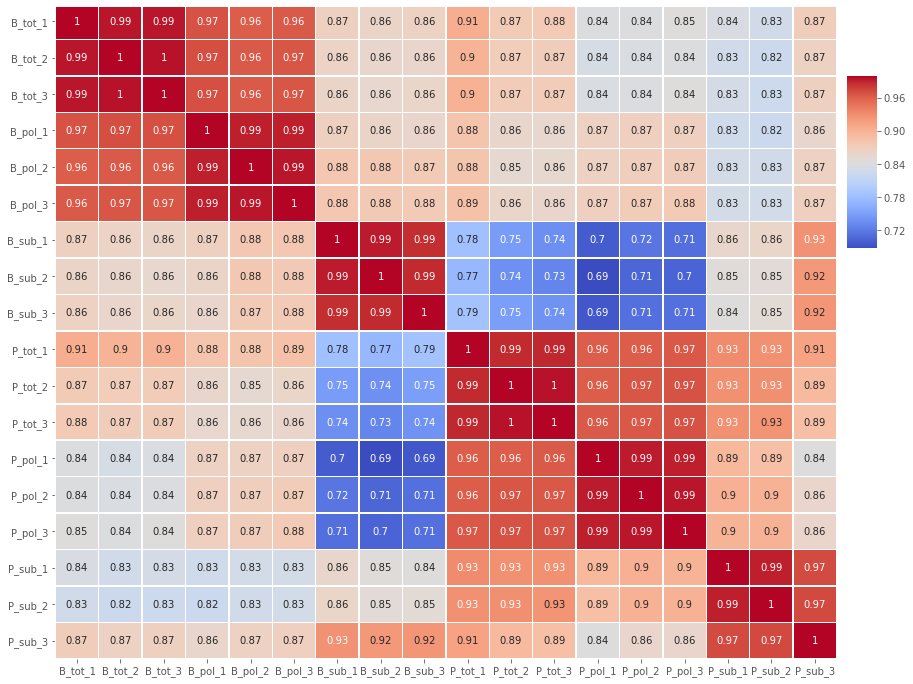

In [9]:
fig,ax=plt.subplots(figsize=(14,12))
cbar_ax = fig.add_axes([.91, .6, .03, .2])
sns.heatmap(np.log2(indata).corr(),
            #vmin=-1,
            cmap='coolwarm',
            annot=True,linewidths=.5,ax=ax, cbar_ax = cbar_ax, cbar=True)
print(ax.get_ylim())
ax.set_ylim(18,0.1)
plt.savefig('Figures/Figure_2.png')
plt.show()

## QC - MSD

{'r': 'BSF', 'b': 'PCF'}


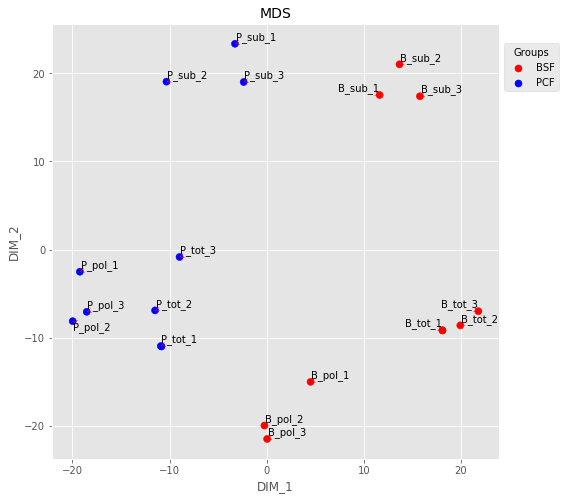

In [10]:
plt.style.use('ggplot')
palette = ['r']*9+['b']*9
fig,ax = plt.subplots(figsize=(8,8), ncols=1, nrows=1)
UT.make_mds(np.log2(indata),palette,ax,color_dictionary={'r':'BSF','b':'PCF'})
plt.savefig('Figures/Figure_3.png')
plt.show()

## Compute Length and GC content

In [11]:
def get_gene_ids(n):
    res = {}
    temp = n.split(';')
    temp =[n.strip() for n in temp if len(n)>2]
    for f in temp:
        key = f.split(' ')[0]
        value = f.split(' ')[1]
        key=key.replace('\"','').replace('\'','').strip()
        value=value.replace('\"','').replace('\'','').strip()
        res[key]=value
    return res['gene_id']

In [12]:
gc_content = pd.read_csv('InData/GC_content_927.txt',sep='\t')
gc_content = gc_content[gc_content['8_usercol']=='transcript']
gc_content['gene_id'] = [get_gene_ids(n) for n in gc_content['10_usercol']]
gc_content = gc_content.drop_duplicates('gene_id')
gc_content.set_index('gene_id',inplace=True)
gc_content=gc_content[['19_seq_len','12_pct_gc']]
gc_content.columns = ['length', 'gccontent']
gc_content.head()

,length,gccontent
gene_id,,
MSTRG.1,2768,0.505419
MSTRG.2,2482,0.304593
TRY.1,746,0.273458
TRY.2,1531,0.288047
TRY.3,1390,0.379856


In [13]:
print(indata.shape)
indata=indata.join(gc_content,how='inner')
gc_content = gc_content[['length', 'gccontent']]
indata.drop(['length', 'gccontent'],axis=1,inplace=True) 
indata.head()

(15743, 18)


,B_tot_1,B_tot_2,B_tot_3,B_pol_1,B_pol_2,B_pol_3,B_sub_1,B_sub_2,B_sub_3,P_tot_1,P_tot_2,P_tot_3,P_pol_1,P_pol_2,P_pol_3,P_sub_1,P_sub_2,P_sub_3
Tb10.v4.0073,1,1,0,0,0,0,1,0,2,0,1,2,0,0,0,0,0,0
Tb10.v4.0074,0,1,1,1,0,0,1,2,1,0,0,0,0,0,0,0,0,0
Tb10.v4.0075,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Tb10.v4.0076,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Tb10.v4.0077,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Literature Comparison

In [14]:
scale_rpkm = indata.sum()/1000000
indata_rpkm = indata.divide(scale_rpkm,axis=1)
indata_rpkm=indata_rpkm.join(gc_content,how='left')
indata_rpkm.head()

,B_tot_1,B_tot_2,B_tot_3,B_pol_1,B_pol_2,B_pol_3,B_sub_1,B_sub_2,B_sub_3,P_tot_1,P_tot_2,P_tot_3,P_pol_1,P_pol_2,P_pol_3,P_sub_1,P_sub_2,P_sub_3,length,gccontent
Tb10.v4.0073,0.026099,0.027861,0.000000,0.000000,0.0,0.0,0.027174,0.000000,0.060649,0.0,0.024299,0.064283,0.0,0.0,0.0,0.000000,0.0,0.00000,561,0.413547
Tb10.v4.0074,0.000000,0.027861,0.029549,0.028106,0.0,0.0,0.027174,0.061636,0.030324,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,678,0.364307
Tb10.v4.0075,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.035462,0.0,0.00000,1443,0.493416
Tb10.v4.0076,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,1458,0.496571
Tb10.v4.0077,0.000000,0.000000,0.000000,0.028106,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.03019,1287,0.471639


In [15]:
length = indata_rpkm['length']
indata_rpkm.drop(['length','gccontent'],inplace=True,axis=1)
indata_rpkm=indata_rpkm.divide(length/1000,axis=0)
indata_rpkm.head()

,B_tot_1,B_tot_2,B_tot_3,B_pol_1,B_pol_2,B_pol_3,B_sub_1,B_sub_2,B_sub_3,P_tot_1,P_tot_2,P_tot_3,P_pol_1,P_pol_2,P_pol_3,P_sub_1,P_sub_2,P_sub_3
Tb10.v4.0073,0.046522,0.049663,0.000000,0.000000,0.0,0.0,0.048438,0.000000,0.108109,0.0,0.043314,0.114587,0.0,0.0,0.0,0.000000,0.0,0.000000
Tb10.v4.0074,0.000000,0.041093,0.043582,0.041454,0.0,0.0,0.040079,0.090909,0.044726,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
Tb10.v4.0075,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.024575,0.0,0.000000
Tb10.v4.0076,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
Tb10.v4.0077,0.000000,0.000000,0.000000,0.021838,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.023458


In [16]:
indata_rpkm['B_tot'] = indata_rpkm[['B_tot_1','B_tot_2','B_tot_3']].median(axis=1)
indata_rpkm['P_tot'] = indata_rpkm[['P_tot_1','P_tot_2','P_tot_3']].median(axis=1)
indata_rpkm['B_sub'] = indata_rpkm[['B_sub_1','B_sub_2','B_sub_3']].median(axis=1)
indata_rpkm['P_sub'] = indata_rpkm[['P_sub_1','P_sub_2','P_sub_3']].median(axis=1)
indata_rpkm['B_pol'] = indata_rpkm[['B_pol_1','B_pol_2','B_pol_3']].median(axis=1)
indata_rpkm['P_pol'] = indata_rpkm[['P_pol_1','P_pol_2','P_pol_3']].median(axis=1)
#indata_rpkm = indata_rpkm[['B_tot','B_sub','B_pol','P_tot','P_sub','P_pol']]

### Load TryTripDB dataset

In [17]:
trypdb =pd.read_csv('InData/RNA_dataset.txt',sep='\t')
trypdb.columns = list(trypdb.columns[0:5])+['PCF1','BSF1','PCF2','BSF2','BSF3','PCF3','BSF4','drop']
trypdb.drop(['drop','Organism'],axis=1,inplace=True)
trypdb.set_index('Gene ID',inplace=True)
trypdb=trypdb.join(indata_rpkm,how='inner')
print(trypdb.shape)
trypdb.head()

(11832, 34)


,source_id,Genomic Location (Gene),Product Description,PCF1,BSF1,PCF2,BSF2,BSF3,PCF3,BSF4,...,P_pol_3,P_sub_1,P_sub_2,P_sub_3,B_tot,P_tot,B_sub,P_sub,B_pol,P_pol
Tb04.24M18.150,Tb04.24M18.150:mRNA,"Tb927_04_v5.1:1,458,621..1,459,109(-)","hypothetical protein, conserved",12.62,9.62,10.98,10.93,16.70,16.56,14.39,...,41.907721,44.962178,38.815111,43.340345,36.679039,53.557511,22.076721,43.340345,20.960390,41.907721
Tb04.3I12.100,Tb04.3I12.100:mRNA,"Tb927_04_v5.1:1,312,814..1,313,406(-)",hypothetical protein,4.36,16.45,1.07,13.91,9.91,1.19,14.99,...,7.913274,17.162941,15.516217,16.342348,42.237876,11.256914,19.739040,16.342348,26.115798,7.655404
Tb05.30F7.410,Tb05.30F7.410:mRNA,"Tb927_05_v5.1:288,984..293,087(-)",hypothetical protein,0.10,0.17,0.02,0.08,0.04,0.01,0.00,...,0.521049,4.000720,3.753728,4.001803,1.666166,1.379564,5.568489,4.000720,1.041990,0.532593
Tb05.5K5.10,Tb05.5K5.10:mRNA,5K5_v5.1:3..97(-),"conserved hypothetical protein, conserved (fra...",12.57,6.04,5.21,6.46,8.62,1.31,9.74,...,1.250519,6.345850,5.811232,5.084643,4.692383,2.342228,6.488036,5.811232,4.200130,1.250519
Tb05.5K5.100,Tb05.5K5.100:mRNA,"5K5_v5.1:17,609..18,248(-)","hypothetical protein, conserved",27.05,19.19,25.31,14.10,25.03,16.22,30.96,...,38.841796,44.715497,47.648640,49.200378,26.506823,29.429632,46.434367,47.648640,27.745611,38.841796


In [18]:
trypdb.iloc[:,3:]=np.log10(trypdb.iloc[:,3:])
trypdb=trypdb.replace(np.inf,np.nan).replace(-np.inf,np.nan).dropna()
print(trypdb.shape)
trypdb.head()

(9686, 34)


,source_id,Genomic Location (Gene),Product Description,PCF1,BSF1,PCF2,BSF2,BSF3,PCF3,BSF4,...,P_pol_3,P_sub_1,P_sub_2,P_sub_3,B_tot,P_tot,B_sub,P_sub,B_pol,P_pol
Tb04.24M18.150,Tb04.24M18.150:mRNA,"Tb927_04_v5.1:1,458,621..1,459,109(-)","hypothetical protein, conserved",1.101059,0.983175,1.040602,1.038620,1.222716,1.219060,1.158061,...,1.622294,1.652847,1.589001,1.636892,1.564418,1.728820,1.343935,1.636892,1.321399,1.622294
Tb04.3I12.100,Tb04.3I12.100:mRNA,"Tb927_04_v5.1:1,312,814..1,313,406(-)",hypothetical protein,0.639486,1.216166,0.029384,1.143327,0.996074,0.075547,1.175802,...,0.898356,1.234592,1.190786,1.213314,1.625702,1.051419,1.295326,1.213314,1.416903,0.883968
Tb05.5K5.100,Tb05.5K5.100:mRNA,"5K5_v5.1:17,609..18,248(-)","hypothetical protein, conserved",1.432167,1.283075,1.403292,1.149219,1.398461,1.210051,1.490801,...,1.589299,1.650458,1.678051,1.691968,1.423358,1.468785,1.666840,1.678051,1.443194,1.589299
Tb05.5K5.110,Tb05.5K5.110:mRNA,"5K5_v5.1:18,623..22,146(-)","major vault protein, putative",1.171726,1.105169,1.246006,1.022428,1.284882,1.077731,1.334253,...,1.405725,1.492125,1.473274,1.434982,1.457868,1.411545,1.333028,1.473274,1.494368,1.394487
Tb05.5K5.120,Tb05.5K5.120:mRNA,"5K5_v5.1:21,693..25,373(-)","hypothetical protein, conserved",0.872739,0.900367,1.106191,0.745075,1.115278,0.972666,1.104828,...,1.130024,1.460340,1.423765,1.390005,1.103305,1.233136,1.232546,1.423765,1.011929,1.110147


### plots

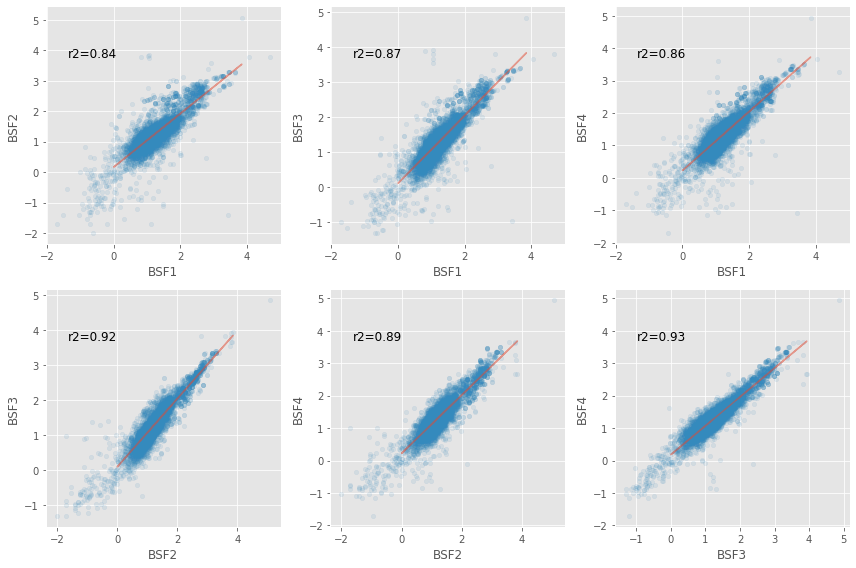

In [19]:
plt.style.use('ggplot')
fig,axes=plt.subplots(ncols=3,nrows=2,figsize=(12,8))
x='BSF1'
y='BSF2'
ax=axes[0,0]
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))

ax=axes[0,1]
x='BSF1'
y='BSF3'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))

ax=axes[0,2]
x='BSF1'
y='BSF4'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))

ax=axes[1,0]
x='BSF2'
y='BSF3'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))

ax=axes[1,1]
x='BSF2'
y='BSF4'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))

ax=axes[1,2]
x='BSF3'
y='BSF4'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))
plt.tight_layout()
plt.savefig('Figures/Figure_8.png')

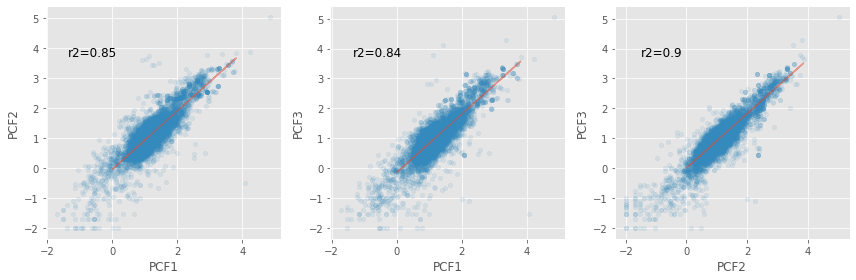

In [20]:
plt.style.use('ggplot')
fig,axes=plt.subplots(ncols=3,nrows=1,figsize=(12,4))

ax=axes[0]
x='PCF1'
y='PCF2'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))

ax=axes[1]
x='PCF1'
y='PCF3'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))

ax=axes[2]
x='PCF2'
y='PCF3'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))
plt.tight_layout()
plt.savefig('Figures/Figure_9.png')

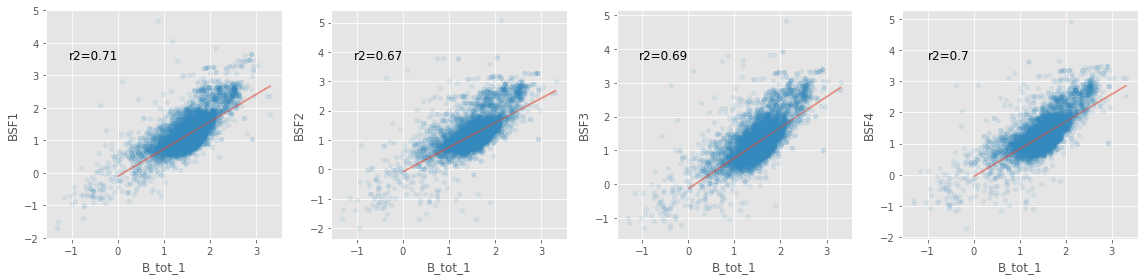

In [21]:

plt.style.use('ggplot')
fig,axes=plt.subplots(ncols=4,nrows=1,figsize=(16,4))

ax=axes[0]
x='B_tot_1'
y='BSF1'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))

ax=axes[1]
x='B_tot_1'
y='BSF2'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))

ax=axes[2]
x='B_tot_1'
y='BSF3'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))


ax=axes[3]
x='B_tot_1'
y='BSF4'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))


plt.tight_layout()
plt.savefig('Figures/Figure_10.png')

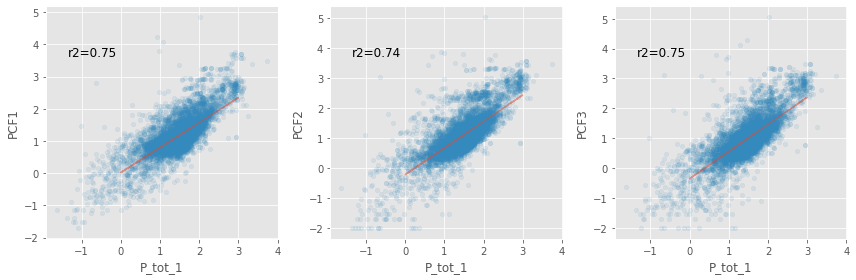

In [22]:
plt.style.use('ggplot')
fig,axes=plt.subplots(ncols=3,nrows=1,figsize=(12,4))

ax=axes[0]
x='P_tot_1'
y='PCF1'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,3))


ax=axes[1]
x='P_tot_1'
y='PCF2'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,3))


ax=axes[2]
x='P_tot_1'
y='PCF3'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,3))
plt.tight_layout()
plt.savefig('Figures/Figure_11.png')

## Data Normalization

### edgeR to filter low counts

In [23]:
%%R -i indata
options(warn=-1)
library("limma") 
library("edgeR")
head(indata)

             B_tot_1 B_tot_2 B_tot_3 B_pol_1 B_pol_2 B_pol_3 B_sub_1 B_sub_2
Tb10.v4.0073       1       1       0       0       0       0       1       0
Tb10.v4.0074       0       1       1       1       0       0       1       2
Tb10.v4.0075       0       0       0       0       0       0       0       0
Tb10.v4.0076       0       0       0       0       0       0       0       0
Tb10.v4.0077       0       0       0       1       0       0       0       0
Tb10.v4.0078       1       0       1       1       0       8       1       5
             B_sub_3 P_tot_1 P_tot_2 P_tot_3 P_pol_1 P_pol_2 P_pol_3 P_sub_1
Tb10.v4.0073       2       0       1       2       0       0       0       0
Tb10.v4.0074       1       0       0       0       0       0       0       0
Tb10.v4.0075       0       0       0       0       0       0       0       1
Tb10.v4.0076       0       0       0       0       0       0       0       0
Tb10.v4.0077       0       0       0       0       0       0       0       0

In [24]:
%%R
group <- factor(c(
    'Btot','Btot','Btot',
    'Bpol','Bpol','Bpol',
    'Bsub','Bsub','Bsub',
    'Ptot','Ptot','Ptot',
    'Ppol','Ppol','Ppol',
    'Psub','Psub','Psub'))

y <- DGEList(counts=indata,group=group)
keep <- filterByExpr(y)
y <- y[keep,,keep.lib.sizes=FALSE]
counts = y$counts
genes = row.names(y)

In [25]:
%R -o counts,genes
indata = pd.DataFrame(counts,index=genes,columns=indata.columns)
indata.shape

(14140, 18)

In [26]:
indata=indata.join(gc_content,how='inner')
indata.shape

(14140, 20)

### GC / length content

In [27]:
gc_content = indata[['length', 'gccontent']]
indata.drop(['length', 'gccontent'],axis=1,inplace=True)
print(indata.shape,gc_content.shape)
indata.head()

(14140, 18) (14140, 2)


,B_tot_1,B_tot_2,B_tot_3,B_pol_1,B_pol_2,B_pol_3,B_sub_1,B_sub_2,B_sub_3,P_tot_1,P_tot_2,P_tot_3,P_pol_1,P_pol_2,P_pol_3,P_sub_1,P_sub_2,P_sub_3
Tb927.8.130,7,6,5,1,1,7,12,8,19,5,8,4,3,3,3,11,8,13
Tb927.8.150,47,30,36,19,14,14,26,19,25,26,27,28,10,5,18,17,22,30
Tb927.8.230,7,2,6,2,5,4,18,15,24,1,0,0,0,0,1,0,0,0
Tb927.8.270,1131,954,868,665,625,592,654,675,700,717,494,396,267,249,306,576,639,720
Tb927.8.320,11,12,16,11,14,12,34,48,33,19,22,7,18,20,10,33,65,41


### size factors

In [28]:
sizeFactors=indata.sum()
sizeFactors = sizeFactors.values
sizeFactors

array([38314002, 35890982, 33841087, 35578927, 38349642, 40097783,
       36797906, 32446524, 32974208, 44940986, 41152940, 31111972,
       29976731, 35685354, 33670032, 28198566, 38038321, 33122597])

In [29]:
#np.log2(gc_content['length']/1000).plot(kind='hist')

### Bias Correction

In [30]:
%%R -i gc_content,indata,sizeFactors
library(cqn)
library(scales)

R[write to console]: Loading required package: mclust

R[write to console]: Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.

R[write to console]: Loading required package: nor1mix

R[write to console]: Loading required package: preprocessCore

R[write to console]: Loading required package: splines

R[write to console]: Loading required package: quantreg

R[write to console]: Loading required package: SparseM

R[write to console]: 
Attaching package: ‘SparseM’


R[write to console]: The following object is masked from ‘package:base’:

    backsolve




In [31]:
%%R
stopifnot(all(rownames(indata) == rownames(gc_content)))
cqn.subset <- cqn(indata, lengths = gc_content$length,
                  x = gc_content$gccontent, sizeFactors = sizeFactors,
                  verbose = TRUE)

RQ fit ..................
SQN .


In [32]:
%R cqn.subset

R object with classes: ('cqn',) mapped to:
[ListSexpV..., IntSexpVe..., IntSexpVe..., IntSexpVe..., ..., FloatSexp..., FloatSexp..., FloatSexp..., LangSexpV...]
R object with classes: ('cqn',) mapped to:
[ListSexpV..., IntSexpVe..., IntSexpVe..., IntSexpVe..., ..., FloatSexp..., FloatSexp..., FloatSexp..., LangSexpV...]
  lengths: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('RTYPES.INTSXP',) mapped to:
[2,764, 7,764, 1,102, 13,000, ..., 792, 2,195, 816, 530]
  sizeFactors: <class 'rpy2.robjects.vectors.IntArray'>
  R object with classes: ('array',) mapped to:
[38,314,002, 35,890,982, 33,841,087, 35,578,927, ..., 33,670,032, 28,198,566, 38,038,321, 33,122,597]
  subindex: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('RTYPES.INTSXP',) mapped to:
[4, 6, 7, 8, ..., 14,132, 14,133, 14,134, 14,138]
...
  x: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[-8.380822, -8.215943, -8.051065, -7.886186, ..., 7.612393, 7.777272, 7.942150, 8.107029]
  offset: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[0.334512, 0.438454, 0.479700, 0.507985, 0.541282]
  offset0: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[-3.036921, -0.424688, 0.495695, 1.281253, 2.886087]
  glm.offset: <class 'rpy2.rinterface.LangSexpVector'>
  <rpy2.rinterface.LangSexpVector object at 0x2ad69e8b5948> [RTYPES.LANGSXP]

### Viz Bias

In [33]:
%%R
cqnplot <- function(x, n = 1, col = "grey60", ylab="estimated bias effect", 
                    xlab = "", type = "l", lty = 1, ...) {
    if(class(x) != "cqn")
        stop("'x' needs to be of class 'cqn'")
    if(n == 1) {
        func <- x$func1
        grid <- x$grid1
        knots <- x$knots1
    }
    if(n == 2) {
        if(is.null(x$func2))
            stop("argument 'x' does not appear to have two smooth functions (component 'func2' is NULL)")
        func <- x$func2
        grid <- x$grid2
        knots <- x$knots2
    }
    
    
    #par(mar=c(5.1, 4.1, 4.1, 8.1), xpd=TRUE)
    matplot(replicate(ncol(func), grid), func, ylab = ylab, xlab = xlab, type = type,
            col = col, lty = lty, ...)
    
    legend("bottomleft", legend = colnames(x$counts), inset=c(1,0),
           title="Samples", lty = lty, col = col)
    rug(knots, lwd = 2)
    invisible(x)
    
}


library(repr)
#options(repr.plot.width = 10, repr.plot.height = 0.75)
# Change plot size to 4 x 3
#options(repr.plot.width=4, repr.plot.height=3)


colors <- c(
    'grey','grey','grey',
    'green','green','green',
    'blue','blue','blue',
    'grey','grey','grey',
    'green','green','green',
    'blue','blue','blue'
           )
lty =c(1,1,1,1,1,1,1,1,1,
       2,2,2,2,2,2,2,2,2)

png("Figures/Figure_12.png")
#par(mfrow=c(1,2))
cqnplot(cqn.subset, col=colors,
        n = 1, xlab = "GC content", lty = lty,
        ylim = c(1,12), 
        

       )
dev.off()

#ggsave('plot.png', width=8.27, height= 11.69) #A4 size in inches
#dev.off()

png 
  2 


In [34]:
%%R
library(repr)
#options(repr.plot.width = 12, repr.plot.height = 0.75)
# Change plot size to 4 x 3
#options(repr.plot.width=8, repr.plot.height=3)


colors <- c(
    'grey','grey','grey',
    'green','green','green',
    'blue','blue','blue',
    'grey','grey','grey',
    'green','green','green',
    'blue','blue','blue'
           )
lty =c(1,1,1,1,1,1,1,1,1,
       2,2,2,2,2,2,2,2,2)

#par(mfrow=c(1,2))
png("Figures/Figure_13.png")
cqnplot(cqn.subset, col=colors,
        n = 2, xlab = "length", lty = lty,
        ylim = c(-5,16), 
    
       )
dev.off()

png 
  2 


### Bias Correction

In [35]:
%%R
RPKM.cqn <- cqn.subset$y + cqn.subset$offset
out_table <- RPKM.cqn
head(out_table)

              B_tot_1   B_tot_2   B_tot_3    B_pol_1     B_pol_2   B_pol_3
Tb927.8.130 -3.282676 -3.257054 -3.768777 -3.4577263 -3.21377525 -1.291654
Tb927.8.150 -1.560525 -1.560525 -1.954639 -0.7305703 -1.10785351 -1.194004
Tb927.8.230 -1.107854 -2.784440 -1.107854 -1.4230185 -0.57075420 -1.194004
Tb927.8.270  3.578581  3.407531  3.272858  3.8777703  4.03595409  3.785994
Tb927.8.320 -3.161973 -2.837740 -2.774155 -1.1940036 -0.80033425 -1.194004
Tb927.8.443  5.303756  4.572997  4.969966  1.3953030  0.09563214  1.010653
                B_sub_1     B_sub_2    B_sub_3    P_tot_1    P_tot_2   P_tot_3
Tb927.8.130 -0.67394905 -1.00802173 -0.3198002 -1.1078535 0.82855512 0.4983583
Tb927.8.150  0.04926842 -0.28536925 -0.2208666 -0.2208666 0.91442646 0.9918283
Tb927.8.230  0.09563214 -0.07808835  0.3120751 -0.4894925 0.07229498 0.3807392
Tb927.8.270  4.33861903  4.49595866  4.3346767  3.5785811 3.36061830 3.4199107
Tb927.8.320  0.69342203  1.29063878  0.2720890  0.1179624 1.22373897 0.5711890
T

In [36]:
#out_table

In [37]:
%R -o out_table
out_table = pd.DataFrame(out_table,index=indata.index.values,columns=indata.columns)
out_table.head()

,B_tot_1,B_tot_2,B_tot_3,B_pol_1,B_pol_2,B_pol_3,B_sub_1,B_sub_2,B_sub_3,P_tot_1,P_tot_2,P_tot_3,P_pol_1,P_pol_2,P_pol_3,P_sub_1,P_sub_2,P_sub_3
Tb927.8.130,-3.282676,-3.257054,-3.768777,-3.457726,-3.213775,-1.291654,-0.673949,-1.008022,-0.319800,-1.107854,0.828555,0.498358,0.611492,0.498358,0.624232,0.903604,0.705244,-0.354389
Tb927.8.150,-1.560525,-1.560525,-1.954639,-0.730570,-1.107854,-1.194004,0.049268,-0.285369,-0.220867,-0.220867,0.914426,0.991828,0.465557,-0.319800,0.943599,0.914426,1.057355,0.253677
Tb927.8.230,-1.107854,-2.784440,-1.107854,-1.423018,-0.570754,-1.194004,0.095632,-0.078088,0.312075,-0.489492,0.072295,0.380739,0.680918,0.529414,1.141701,-0.130728,-0.449000,-2.782215
Tb927.8.270,3.578581,3.407531,3.272858,3.877770,4.035954,3.785994,4.338619,4.495959,4.334677,3.578581,3.360618,3.419911,4.041212,3.901896,3.949511,4.492680,4.361705,4.545296
Tb927.8.320,-3.161973,-2.837740,-2.774155,-1.194004,-0.800334,-1.194004,0.693422,1.290639,0.272089,0.117962,1.223739,0.571189,1.911703,1.933851,1.150353,1.839096,2.420792,1.207595


### Visualise Normalized Counts

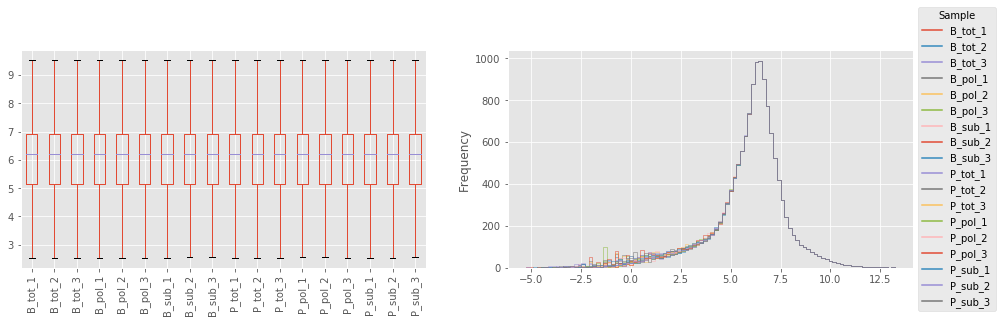

(14140, 18)


In [38]:
fig,axes=plt.subplots(figsize=(16,4),ncols=2)
ax = axes[0]
out_table.plot(kind='box',ax=ax,rot=90,showfliers=False)

ax = axes[1]
out_table.replace(-np.inf,-1.5).plot(kind='hist',
                                            histtype='step',
                                            bins=100,ax=ax)
UT.hist_legend(ax,'Sample')
#ax.set_xticklabels(out_df.columns, rotation=90, )
plt.show()
print(out_table.shape)

## Differential Expression Analysis

In [39]:
%%R
library(edgeR)
# Make groups
design_with_all <- model.matrix( ~0+group )

y <- DGEList(counts=indata, 
                  lib.size = sizeFactors,
                  group = group, 
                  )

y$offset <- cqn.subset$glm.offset
# Estimate dispersion
y <- estimateGLMCommonDisp( y, design_with_all )
y <- estimateGLMTrendedDisp( y, design_with_all )
y <- estimateGLMTagwiseDisp( y, design_with_all )
# Fit counts to model
fit_all <- glmFit( y, design_with_all )
contrast_Bpol_v_Bsub <- glmLRT( fit_all, contrast=makeContrasts( groupBpol-groupBsub,
                                                                levels=design_with_all ) )

table_Bpol_v_Bsub <- topTags(contrast_Bpol_v_Bsub, n=Inf, 
                             sort.by = "none", adjust.method="BH")$table
topTags( contrast_Bpol_v_Bsub, n=5 )
head(table_Bpol_v_Bsub)

                logFC     logCPM        LR       PValue          FDR
Tb927.8.130 -1.965316 -1.9979685 11.755227 6.067260e-04 8.737250e-04
Tb927.8.150 -0.875808 -0.5105422  5.835959 1.570185e-02 2.016752e-02
Tb927.8.230 -1.384258 -2.4017823  7.322394 6.810062e-03 9.045113e-03
Tb927.8.270 -0.488544  4.1381651 17.403277 3.023043e-05 4.748481e-05
Tb927.8.320 -1.918329 -0.4645496 24.141754 8.949858e-07 1.539925e-06
Tb927.8.443 -2.317546  0.7800675 31.435008 2.062288e-08 3.901626e-08


In [40]:
%%R
contrast_Ppol_v_Psub <- glmLRT( fit_all, contrast=makeContrasts(groupPpol-groupPsub,
                                                                levels=design_with_all ) )

table_Ppol_v_Psub <- topTags(contrast_Ppol_v_Psub, n=Inf, sort.by = "none", adjust.method="BH")$table
topTags( contrast_Ppol_v_Psub, n=5 )

Coefficient:  1*groupPpol -1*groupPsub 
                   logFC   logCPM       LR        PValue           FDR
Tb927.10.1570   3.004536 5.878210 1517.056  0.000000e+00  0.000000e+00
Tb927.11.6565  -3.262117 5.419665 1328.768 6.331547e-291 3.595645e-287
KS17gene_2065a -3.583624 6.575607 1328.396 7.628668e-291 3.595645e-287
KS17gene_6722a -3.362347 6.600012 1247.341 3.140783e-273 1.110267e-269
KS17gene_4624a -2.924030 5.664774 1199.652 7.261129e-263 2.053447e-259


In [41]:
desc_dict

{'Tb10.v4.0078': 'hypothetical protein',
 'Tb927.8.4730': 'amino acid transporter  putative',
 'Tb10.v4.0183': 'variant surface glycoprotein (VSG  pseudogene)  putative',
 'Tb927.8.4470': 'chaperone protein DnaJ  putative',
 'Tb927.7.5460': 'exosome-associated protein 3',
 'Tb927.4.580': 'hypothetical protein  conserved',
 'Tb927.5.2260': 'conserved protein',
 'Tb927.4.740': 'Rgp1  putative',
 'Tb927.9.3540': 'hypothetical protein  conserved',
 'Tb10.NT.68': 'Noncoding RNA  putative',
 'Tb927_10_v4.snoRNA.0022:snoRNA': 'term',
 'Tb927.8.7110': 'Serine/threonine-protein kinase NEK12.1  putative',
 'Tb927.11.5100': 'hypothetical protein  conserved',
 'Tb927.9.12440': 'hypothetical protein  conserved',
 'Tb927.8.7350': 'trans-sialidase  putative',
 'Tb927.11.3770': 'Dpy-30 motif containing protein  putative',
 'Tb927.11.1190': 'Ring finger domain/PHD-finger  putative',
 'Tb927.8.5560': 'NADH dehydrogenase (ubiquinone) 1 beta subcomplex subunit  putative',
 'Tb11.v5.0302': 'hypothetical pr

In [42]:
%R -o table_Ppol_v_Psub
table_Ppol_v_Psub['log_PValue'] = -np.log10(table_Ppol_v_Psub['PValue'])
table_Ppol_v_Psub['log_FDR'] = -np.log10(table_Ppol_v_Psub['FDR'])
table_Ppol_v_Psub['desc']=[desc_dict.get(n,'none') for n in table_Ppol_v_Psub.index.values]
table_Ppol_v_Psub.to_csv('Tables/Table_5.csv')
table_Ppol_v_Psub.head()

,logFC,logCPM,LR,PValue,FDR,log_PValue,log_FDR,desc
Tb927.8.130,-0.079154,-1.997968,0.015489,0.900956,0.915195,0.045296,0.038486,variant surface glycoprotein (VSG atypical) ...
Tb927.8.150,-0.286653,-0.510542,0.531575,0.465945,0.510615,0.331665,0.291906,variant surface glycoprotein degenerate
Tb927.8.230,4.969581,-2.401782,3.257994,0.071076,0.089974,1.148277,1.045881,expression site-associated gene 3 (ESAG3) deg...
Tb927.8.270,-0.506399,4.138165,16.914871,0.000039,0.000068,4.407889,4.167049,variant surface glycoprotein degenerate
Tb927.8.320,-0.233145,-0.464550,0.383189,0.535901,0.578711,0.270915,0.237538,variant surface glycoprotein degenerate


In [43]:
%R -o table_Bpol_v_Bsub
table_Bpol_v_Bsub.head()
table_Bpol_v_Bsub['log_PValue'] = -np.log10(table_Bpol_v_Bsub['PValue'])
table_Bpol_v_Bsub['log_FDR'] = -np.log10(table_Bpol_v_Bsub['FDR'])

In [44]:
table_Bpol_v_Bsub['desc']=[desc_dict.get(n,'none') for n in table_Bpol_v_Bsub.index.values]
table_Bpol_v_Bsub.head()

,logFC,logCPM,LR,PValue,FDR,log_PValue,log_FDR,desc
Tb927.8.130,-1.965316,-1.997968,11.755227,6.067260e-04,0.000874,3.217007,3.058625,variant surface glycoprotein (VSG atypical) ...
Tb927.8.150,-0.875808,-0.510542,5.835959,1.570185e-02,0.020168,1.804049,1.695348,variant surface glycoprotein degenerate
Tb927.8.230,-1.384258,-2.401782,7.322394,6.810062e-03,0.009045,2.166849,2.043586,expression site-associated gene 3 (ESAG3) deg...
Tb927.8.270,-0.488544,4.138165,17.403277,3.023043e-05,0.000047,4.519556,4.323445,variant surface glycoprotein degenerate
Tb927.8.320,-1.918329,-0.464550,24.141754,8.949858e-07,0.000002,6.048184,5.812501,variant surface glycoprotein degenerate


In [45]:
table_Bpol_v_Bsub.to_csv('Tables/Table_4.csv')

In [46]:
#BRP10 Tb927.8.2780
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5568443/
#table_Bpol_v_Bsub.loc['KS17gene_1749a'],table_Ppol_v_Psub.loc['KS17gene_1749a']

In [47]:
#grumpy
#https://www.biorxiv.org/content/10.1101/2020.05.03.074625v1
#table_Bpol_v_Bsub.loc['KS17gene_3137a'],table_Ppol_v_Psub.loc['KS17gene_3137a']

In [48]:
#https://journals.plos.org/plospathogens/article?id=10.1371/journal.ppat.1006279
#'Tb927.11.14220'
#table_Bpol_v_Bsub.loc['KS17gene_4295a'],table_Ppol_v_Psub.loc['KS17gene_4295a']

In [49]:
#table_Bpol_v_Bsub.shape

### Grumpy

In [50]:
ks_lncRNA = open('InData/GS_gene_list.txt').read().split('\n')
def grampy_VolcanoPlot(table,title,ax=False,ksgene='KS17gene_3137a',xlims=False):
    plt.style.use('ggplot')
    if not ax:
        fig,ax=plt.subplots(figsize=(12,6))
    ax.set_title(title)
    
    table.plot(x='logFC',y='log_FDR',kind='scatter',s=5,alpha=0.2,ax=ax,c='black',label='the rest')
    
    temp = [n for n in ks_lncRNA if n in table.index.values]
    table.loc[temp].plot(x='logFC',y='log_FDR',kind='scatter',s=10,alpha=1,c='b',ax=ax,
                              label='lncRNA')
    
    
    table.loc[[ksgene]].plot(y='log_FDR',x='logFC',kind='scatter',ax=ax,s=50, alpha=1
                                                   ,c='r',label='Grumpy')
    
    lgnd= ax.legend()
    lgnd.legendHandles[0]._sizes = [20]
    lgnd.legendHandles[1]._sizes = [20]
    lgnd.legendHandles[2]._sizes = [20]
    if xlims:
        ax.set_xlim(xlims[0],xlims[1])

def grampy_MAplot(table,title,ksgene='KS17gene_3137a'):
    plt.style.use('ggplot')
    fig,ax=plt.subplots(figsize=(12,6))
    ax.set_title(title)
    table.plot(x='logCPM',y='logFC',kind='scatter',s=5,alpha=0.2,ax=ax,c='black',label='the rest')
    temp = [n for n in ks_lncRNA if n in table.index.values]
    table.loc[temp].plot(x='logCPM',y='logFC',kind='scatter',s=10,alpha=1,c='b',ax=ax,
                             label='lncRNA')
    table.loc[[ksgene]].plot(y='logFC',x='logCPM',kind='scatter',ax=ax,s=50, alpha=1
                                                   ,c='r',label='Grumpy')
    lgnd= ax.legend()
    for i,n in enumerate(lgnd.legendHandles):
        n._sizes = [20]

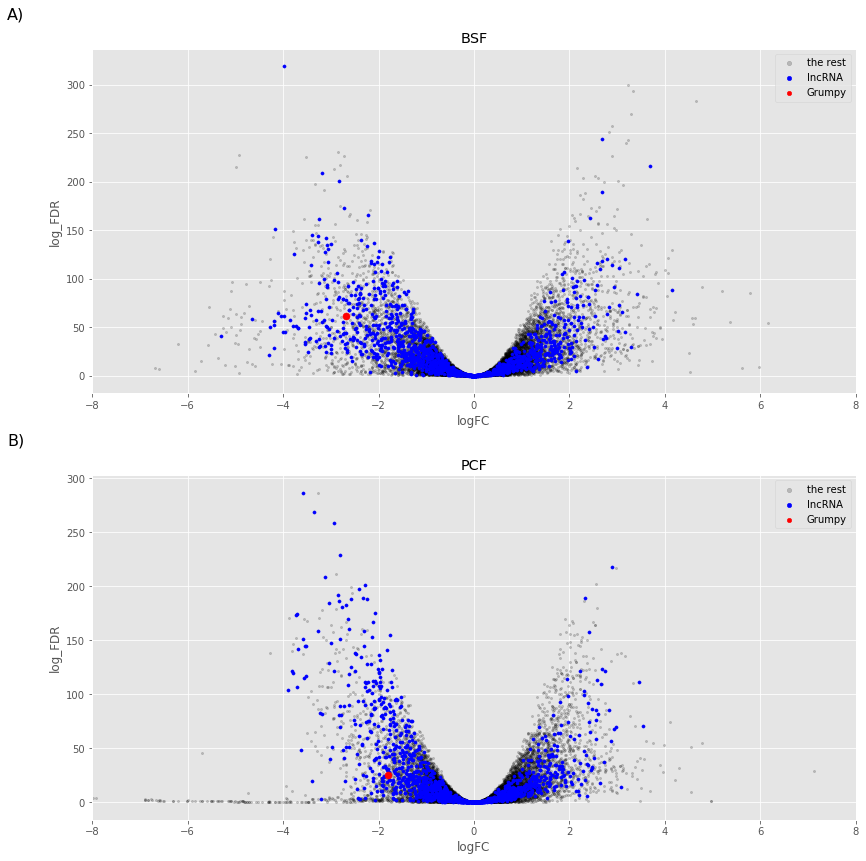

In [51]:
fig,axes=plt.subplots(figsize=(12,12),nrows=2)
grampy_VolcanoPlot(table_Bpol_v_Bsub,'BSF',axes[0],xlims=(-8,8))
grampy_VolcanoPlot(table_Ppol_v_Psub,'PCF',axes[1],xlims=(-8,8))
UT.set_fig_label(axes[0],'A')
UT.set_fig_label(axes[1],'B')
plt.tight_layout()
plt.savefig('Figures/Figure_19.png')

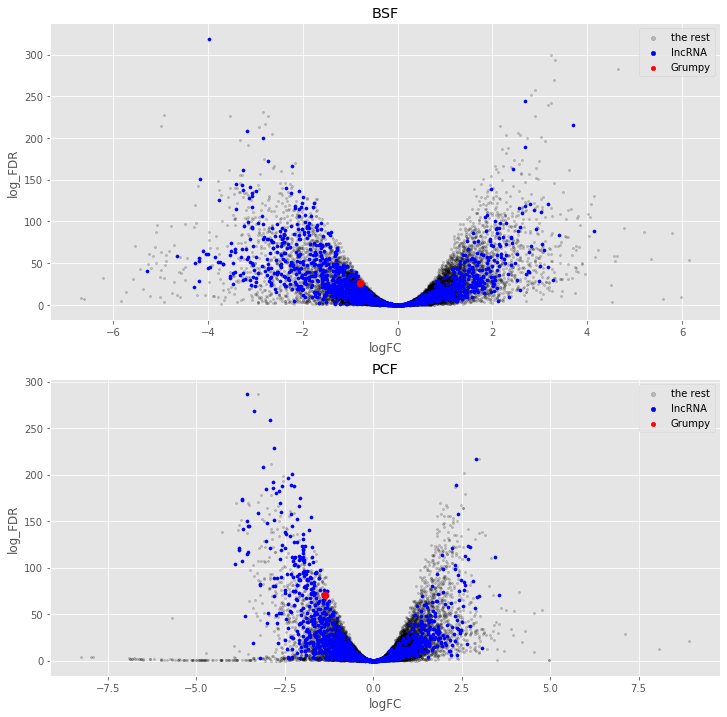

In [52]:
fig,axes=plt.subplots(figsize=(12,12),nrows=2)
grampy_VolcanoPlot(table_Bpol_v_Bsub,'BSF',axes[0],'KS17gene_1749a')
grampy_VolcanoPlot(table_Ppol_v_Psub,'PCF',axes[1],'KS17gene_1749a')


### average subpolysome/polysome

In [53]:
%%R
contrast_pol_v_sub <- glmLRT( fit_all, contrast=makeContrasts((groupPsub+groupBsub)/2-(groupPpol+groupBpol)/2,
                                                                levels=design_with_all ) )

table_pol_v_sub <- topTags(contrast_pol_v_sub, n=Inf, sort.by = "none", adjust.method="BH")$table
topTags( contrast_pol_v_sub, n=20 )
#head(contrast_pol_v_sub)

Coefficient:  -0.5*groupBpol 0.5*groupBsub -0.5*groupPpol 0.5*groupPsub 
                   logFC   logCPM       LR PValue FDR
MSTRG.789      -3.828780 7.003449 1915.150      0   0
KS17gene_34a    3.489532 6.534084 1552.585      0   0
Tb927.8.7860    3.416754 7.572475 1495.650      0   0
KS17gene_2065a  3.209501 6.575607 2247.838      0   0
KS17gene_6398a -3.141442 6.872991 1497.778      0   0
Tb927.10.6060  -3.106154 5.969193 2129.058      0   0
Tb927.4.3870    3.076219 6.483303 1643.861      0   0
Tb927.11.6565   3.032878 5.419665 2324.904      0   0
KS17gene_2098a  2.995660 6.022239 1655.596      0   0
KS17gene_3178a  2.990313 6.000808 1907.088      0   0
Tb927.10.15040  2.969646 6.375815 1553.852      0   0
Tb927.8.6240   -2.831143 7.036564 1915.944      0   0
KS17gene_6722a  2.802086 6.600012 1830.990      0   0
KS17gene_3335a -2.794101 6.354910 1883.353      0   0
Tb927.4.3060   -2.771493 6.080590 1984.568      0   0
TRY.574        -2.714306 5.964096 1641.516      0   0
TRY.222  

In [54]:
%R -o table_pol_v_sub
table_pol_v_sub.head()
table_pol_v_sub['log_PValue'] = -np.log10(table_pol_v_sub['PValue'])
table_pol_v_sub['log_FDR'] = -np.log10(table_pol_v_sub['FDR'])


In [55]:
#table_pol_v_sub.loc['KS17gene_1749a']

#### volcano

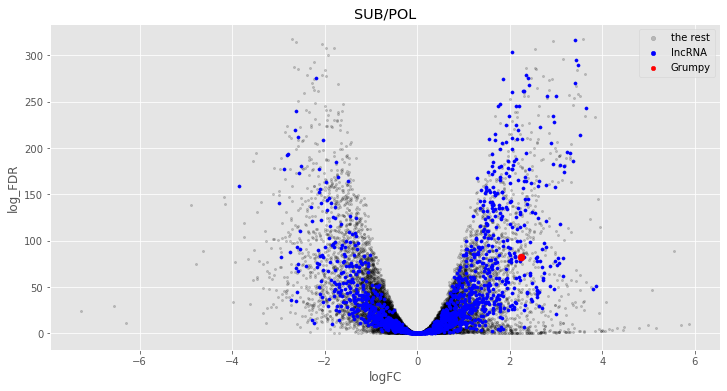

In [56]:
grampy_VolcanoPlot(table_pol_v_sub,'SUB/POL')

#### MA

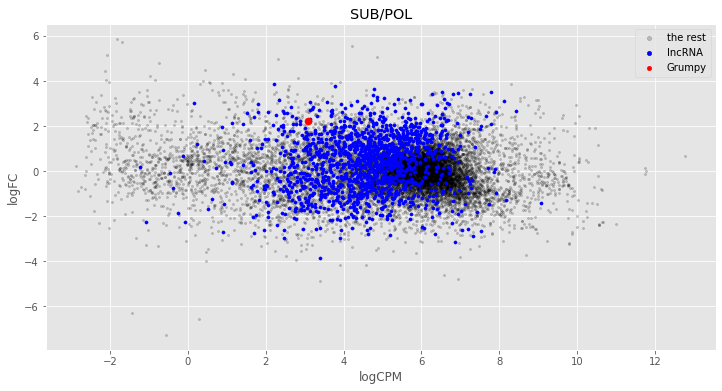

In [57]:
grampy_MAplot(table_pol_v_sub,'SUB/POL')

In [58]:
table_pol_v_sub.loc['KS17gene_4295a']

logFC         0.136541
logCPM        1.380043
LR            0.776994
PValue        0.378062
FDR           0.404678
log_PValue    0.422437
log_FDR       0.392890
Name: KS17gene_4295a, dtype: float64

In [59]:
#table_pol_v_sub.plot(kind='scatter',x='logCPM',y='logFC',alpha=0.1)

## ANOVA Like

In [60]:
%%R
design_anova <- model.matrix(~group, data=y$samples)
fit <- glmQLFit(y, design_anova)
qlf <- glmQLFTest(fit, coef=2:6)
anova_like <- topTags(qlf, n=Inf, sort.by = "none", adjust.method="BH")$table
head(anova_like)

            logFC.groupBsub logFC.groupBtot logFC.groupPpol logFC.groupPsub
Tb927.8.130       1.9692065      -0.8702317      2.85296225       2.9120843
Tb927.8.150       0.8758215      -0.6347646      1.44283687       1.7248985
Tb927.8.230       1.3840543      -0.4125809      0.20250206      -4.7667343
Tb927.8.270       0.4884420      -0.4766888      0.05907328       0.5654312
Tb927.8.320       1.9136330      -1.8201977      2.78378920       3.0093891
Tb927.8.443       2.3200736       4.2938419      1.06051632       2.5821182
            logFC.groupPtot     logCPM         F       PValue          FDR
Tb927.8.130       2.4720000 -1.9979685 14.696221 1.621658e-05 1.835594e-05
Tb927.8.150       1.6035499 -0.5105422 16.216018 8.599954e-06 9.885647e-06
Tb927.8.230      -0.7849895 -2.4017823  7.233348 1.500772e-03 1.566119e-03
Tb927.8.270      -0.4457517  4.1381651 42.835952 9.451225e-09 1.457682e-08
Tb927.8.320       1.7241200 -0.4645496 42.664720 9.735790e-09 1.498140e-08
Tb927.8.443       

In [61]:
%R -o anova_like
anova_like=anova_like[['F', 'PValue', 'FDR']]
anova_threshold = 1e-2
anova_like.shape,anova_like[anova_like['FDR']<anova_threshold].shape

((14140, 3), (13789, 3))

In [62]:
out_table.shape

(14140, 18)

In [63]:
#%%R
#library(HybridMTest)
#computed but not used for now
#anova_test <- row.oneway.anova(cpm_df, group)
#FDR1 <- p.adjust(anova_test$pval, "bonferroni")

In [64]:
#%R -o cpm_df,anova_test,FDR1,tt_Bsub_Bpol

In [65]:
#%R length(FDR1[FDR1 < 0.01])

In [66]:
out_df = out_table.copy()

In [67]:
out_df.head()

,B_tot_1,B_tot_2,B_tot_3,B_pol_1,B_pol_2,B_pol_3,B_sub_1,B_sub_2,B_sub_3,P_tot_1,P_tot_2,P_tot_3,P_pol_1,P_pol_2,P_pol_3,P_sub_1,P_sub_2,P_sub_3
Tb927.8.130,-3.282676,-3.257054,-3.768777,-3.457726,-3.213775,-1.291654,-0.673949,-1.008022,-0.319800,-1.107854,0.828555,0.498358,0.611492,0.498358,0.624232,0.903604,0.705244,-0.354389
Tb927.8.150,-1.560525,-1.560525,-1.954639,-0.730570,-1.107854,-1.194004,0.049268,-0.285369,-0.220867,-0.220867,0.914426,0.991828,0.465557,-0.319800,0.943599,0.914426,1.057355,0.253677
Tb927.8.230,-1.107854,-2.784440,-1.107854,-1.423018,-0.570754,-1.194004,0.095632,-0.078088,0.312075,-0.489492,0.072295,0.380739,0.680918,0.529414,1.141701,-0.130728,-0.449000,-2.782215
Tb927.8.270,3.578581,3.407531,3.272858,3.877770,4.035954,3.785994,4.338619,4.495959,4.334677,3.578581,3.360618,3.419911,4.041212,3.901896,3.949511,4.492680,4.361705,4.545296
Tb927.8.320,-3.161973,-2.837740,-2.774155,-1.194004,-0.800334,-1.194004,0.693422,1.290639,0.272089,0.117962,1.223739,0.571189,1.911703,1.933851,1.150353,1.839096,2.420792,1.207595


## RadViz - Signature in BSF SUB

In [68]:
#https://stackoverflow.com/questions/312443/how-do-you-split-a-list-into-evenly-sized-chunks
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

#from cqn These values are on the log2scale.        
radviz_dataset = np.exp(out_df).copy()

radviz_dataset=radviz_dataset[anova_like['FDR']<anova_threshold]
cols = list(radviz_dataset.columns)
#group coluns in cunk of 3 to compute the mean
col_grups = chunks(cols, 3)
for g in col_grups:
    base = '_'.join(g[0].split('_')[0:2])
    radviz_dataset[base]=radviz_dataset[g].median(axis=1)

#assign each gene to the class with max count

classes = radviz_dataset.iloc[:,18:].idxmax(axis=1)
#replace = {'B_pol':0, 'B_sub':1, 'B_tot':2, 'P_pol':3, 'P_sub':4, 'P_tot':5}
#classes = classes.replace(replace)
radviz_dataset=radviz_dataset.iloc[:,18:]
radviz_dataset['classes']=classes
radviz_dataset.head()

,B_tot,B_pol,B_sub,P_tot,P_pol,P_sub,classes
Tb927.8.130,0.037528,0.040205,0.509692,1.646017,1.843180,2.024340,P_sub
Tb927.8.150,0.210026,0.330267,0.801824,2.495344,1.592901,2.495344,P_tot
Tb927.8.230,0.330267,0.303006,1.100354,1.074972,1.975691,0.638266,P_pol
Tb927.8.270,30.190606,48.316366,76.601682,30.566684,51.909984,89.360614,P_sub
Tb927.8.320,0.058558,0.303006,2.000550,1.770371,6.764600,6.290846,P_pol


In [69]:
radviz_dataset.shape

(13789, 7)

### RadViz figure

B_sub
P_pol
P_sub
B_pol
B_tot
P_tot
['B_tot', 'P_tot', 'B_sub', 'P_sub', 'B_pol', 'P_pol']


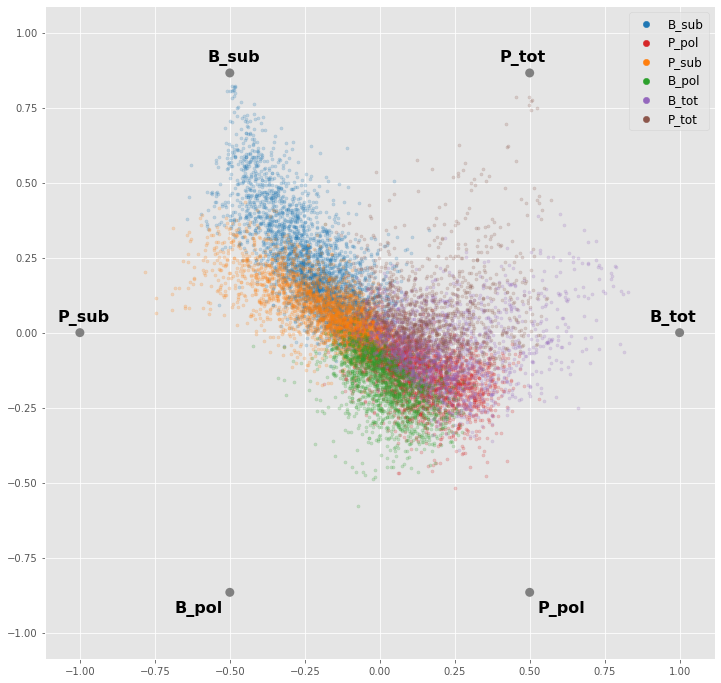

In [70]:
fig,ax=plt.subplots(figsize=(12,12))
cols = [n for n in out_df.columns if n.endswith('_mean')]
color = {'B_tot':'tab:purple','B_pol':'tab:green','B_sub':'tab:blue',
         'P_tot':'tab:brown','P_pol':'tab:red','P_sub':'tab:orange'}

radviz_dataset=radviz_dataset[['B_tot','P_tot','B_sub','P_sub','B_pol','P_pol','classes']]
rad_viz,to_plot,s = UT.radviz(radviz_dataset, 
                           'classes', color=color,ax=ax,)
plt.savefig('Figures/Figure_14.png')

## Cluster analysis

In [71]:
#mydata = out_df.iloc[:,:18]
#min_values = []
#for col in mydata:
#    min_values.append(mydata[col][mydata[col]>0].min())
#min_values
#del mydata


cluster_dataset=np.exp(out_df.iloc[:,:18])#+min_values
cluster_dataset.head()
cluster_dataset.describe()

,B_tot_1,B_tot_2,B_tot_3,B_pol_1,B_pol_2,B_pol_3,B_sub_1,B_sub_2,B_sub_3,P_tot_1,P_tot_2,P_tot_3,P_pol_1,P_pol_2,P_pol_3,P_sub_1,P_sub_2,P_sub_3
count,14140.000000,14140.000000,14140.000000,14140.000000,14140.000000,14140.000000,14140.000000,14140.000000,14140.000000,14140.000000,14140.000000,14140.000000,14140.000000,14140.000000,14140.000000,14140.000000,14140.000000,14140.000000
mean,1681.025485,1680.945759,1681.003667,1681.096403,1681.100281,1681.072664,1681.351107,1681.456072,1681.489363,1681.272320,1681.468331,1681.462056,1681.686230,1681.661465,1681.590446,1681.419115,1681.434311,1681.312983
std,9426.262104,9426.275671,9426.265841,9426.249707,9426.248883,9426.253831,9426.206893,9426.189700,9426.184323,9426.219690,9426.185483,9426.186974,9426.149549,9426.153406,9426.164680,9426.195109,9426.192692,9426.214657
min,0.006079,0.011392,0.005263,0.011817,0.012588,0.020864,0.028816,0.014785,0.008267,0.015899,0.077233,0.090001,0.086550,0.054743,0.089013,0.078986,0.057492,0.010362
25%,173.624546,173.624546,173.624546,173.778094,173.624546,173.624546,174.093500,174.403185,174.403185,174.093500,174.175668,174.175668,174.486360,174.486360,174.175668,174.093500,174.093500,174.486360
50%,491.000946,491.000946,491.000946,491.000946,491.000946,491.000946,491.000946,491.000946,491.100604,491.000946,491.000946,491.000946,491.100604,491.100604,491.000946,491.000946,491.100604,491.000946
75%,998.108630,998.108630,998.108630,998.108630,998.108630,998.108630,998.108630,998.108630,998.108630,998.108630,998.108630,998.108630,998.108630,998.108630,998.108630,998.108630,998.108630,998.108630
max,555151.337018,555151.337018,555151.337018,555151.337018,555151.337018,555151.337018,555151.337018,555151.337018,555151.337018,555151.337018,555151.337018,555151.337018,555151.337018,555151.337018,555151.337018,555151.337018,555151.337018,555151.337018


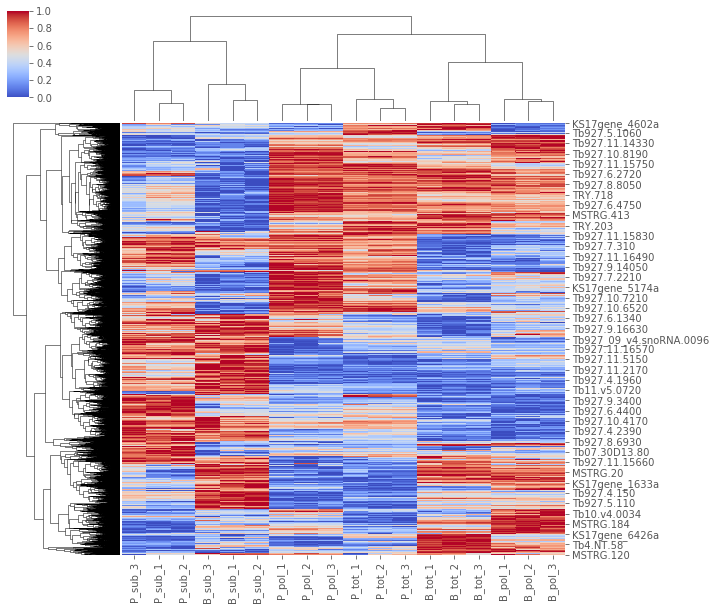

In [72]:
#%R -o anova_test,FDR
cluster_dataset=out_df.iloc[:,:18]
clustergrid = sns.clustermap(cluster_dataset[anova_like['FDR']<anova_threshold].sample(frac=0.3),
                             cmap=sns.color_palette("coolwarm", 256), 
                             standard_scale=0)


### Number of clusters

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


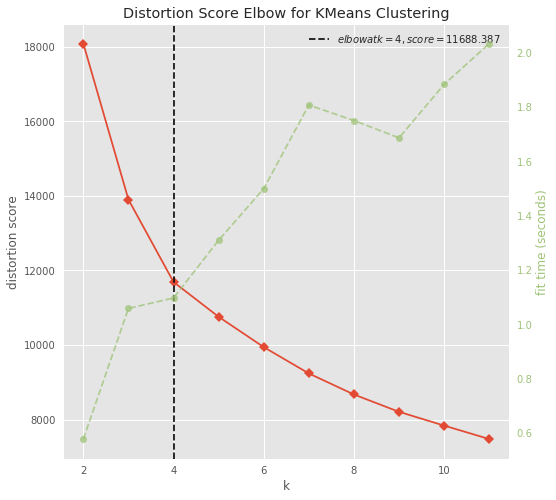

In [73]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
plt.style.use('ggplot')
X = UT.standard_scale(cluster_dataset[anova_like['FDR']<anova_threshold],0)
# Instantiate the clustering model and visualizer
model = KMeans()
fig, ax = plt.subplots(figsize=(8,8)) 
visualizer = KElbowVisualizer(model, k=(2,12),ax=ax)

visualizer.fit(X.values)        # Fit the data to the visualizer


visualizer.show(outpath="Figures/Figure_15.png")
#visualizer.show()


In [74]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
pd.Series(kmeans.labels_).value_counts()

0    4342
3    3493
1    3187
2    2767
dtype: int64

In [ ]:
#from sklearn.cluster import SpectralBiclustering

#clustering = SpectralBiclustering(n_clusters=5,
#assign_labels="discretize",
#random_state=0).fit(X)
#pd.Series(clustering.labels_).value_counts()

### Cluster figure

In [ ]:
#print(order)
#dict_replace = dict(zip(order,[1,2,3,4]))

In [ ]:
#res = TDdf[anova_test['FDR']<0.01]
X['label']=kmeans.labels_+1
#X['label']=X['label'].replace(dict_replace)
order = pd.Series(kmeans.labels_).value_counts().index.values

list_df = []
for n in order:
    list_df.append(X[X['label']==n+1])

final_list_df = []
for index,temp_df in enumerate(list_df):
    temp_df['label']=index+1
    final_list_df.append(temp_df)
    

X = pd.concat(final_list_df)


fig, ax = plt.subplots(figsize=(10,10))  
cbar_ax = fig.add_axes([.91, .6, .03, .2])
# Sample figsize in inches




sns.heatmap(X.iloc[:,0:-1].T.iloc[
    clustergrid.dendrogram_col.reordered_ind].T.astype(float),
            cmap=sns.color_palette("coolwarm", 3),
           ax=ax, cbar_ax = cbar_ax, cbar=True)

plt.savefig('Figures/Figure_16.png')

In [ ]:
X.sort_values(['label']).drop_duplicates('label')['label']

In [ ]:
clusters = list(X['label'].unique())
X.groupby('label').size()

In [ ]:
fig, axes = plt.subplots(figsize=(10,10),nrows=4)

for c in [1,2,3,4]:
    
    #print(c,c-1)
    b=c-1
    sns.heatmap(X[X['label']==c].iloc[:,0:-1].T.iloc[
    clustergrid.dendrogram_col.reordered_ind].T.astype(float),
    cmap=sns.color_palette("coolwarm", 3),
    ax=axes[b])



In [ ]:
ks_lncRNA = open('GS_gene_list.txt').read().split('\n')
X['is_ks']=[1 if n in ks_lncRNA else 0 for n in X.index.values]
len(ks_lncRNA)
X['is_ks'].value_counts()

### Table lncRNA enrichment in clusters 


In [ ]:
from scipy import stats


#k = np.arange(5)
#N = 52 # population size
#G = 4  # number of good elements in population
#n = 5  # simple random sample size
#stats.hypergeom.pmf(k, N, G, n)

population_size = X.shape[0]

for n in [1,2,3,4]:
    sample_size = X[X['label']==n].shape[0]
    sample_sucess = X[(X['label']==n) & (X['is_ks']==1) ].shape[0]
    population_sucess = X[X['is_ks']==1].shape[0]
    #print(n, sample_sucess, sample_size, population_sucess, population_size)
    print('cluster {n}: enrichment pvalue={pval:.2e}'.format(n=n, pval =stats.hypergeom.pmf(sample_sucess, 
                                 population_size, 
                                 population_sucess, 
                                 sample_size)))
        
    #avg_value = cluster_dataset.loc[X[(X['label']==n)].index.values][
    #    ['BSF-PCF-1','BSF-PCF-2','BSF-PCF-3']].median(axis=1).median()
    #print(np.log2(avg_value))
    print('_________')

### Cluster Table

In [ ]:

X['desc']=[desc_dict.get(n,'none') for n in X.index.values]
X['H/ACA-like snoRNA']=[1 if 'H/ACA-like snoRNA' in n else 0 for n in X['desc']]
X['snoRNA']=[1 if 'snoRNA' in n else 0 for n in X.index.values]
X['Noncoding']=[1 if 'Noncoding RNA' in n else 0 for n in X['desc']]

### Table snoRNA

In [ ]:
X.groupby('label')['snoRNA','H/ACA-like snoRNA','is_ks'].sum()

In [ ]:
X.to_csv('Tables/Table_1.csv')

In [ ]:
for n in [1,2,3,4]:
    sample_size = X[X['label']==n].shape[0]
    sample_sucess = X[(X['label']==n) & (X['H/ACA-like snoRNA']==1) ].shape[0]
    population_sucess = X[X['H/ACA-like snoRNA']==1].shape[0]
    #print(n, sample_sucess, sample_size, population_sucess, population_size)
    print('cluster {n}: enrichment pvalue={pval:.2e}'.format(n=n, pval =stats.hypergeom.pmf(sample_sucess, 
                                 population_size, 
                                 population_sucess, 
                                 sample_size)))
        
    #avg_value = cluster_dataset.loc[X[(X['label']==n)].index.values][
    #    ['BSF-PCF-1','BSF-PCF-2','BSF-PCF-3']].median(axis=1).median()
    #print(np.log2(avg_value))
    print('_________')

In [ ]:
for n in [1,2,3,4]:
    sample_size = X[X['label']==n].shape[0]
    sample_sucess = X[(X['label']==n) & (X['snoRNA']==1) ].shape[0]
    population_sucess = X[X['snoRNA']==1].shape[0]
    #print(n, sample_sucess, sample_size, population_sucess, population_size)
    print('cluster {n}: enrichment pvalue={pval:.2e}'.format(n=n, pval =stats.hypergeom.pmf(sample_sucess, 
                                 population_size, 
                                 population_sucess, 
                                 sample_size)))
        
    #avg_value = cluster_dataset.loc[X[(X['label']==n)].index.values][
    #    ['BSF-PCF-1','BSF-PCF-2','BSF-PCF-3']].median(axis=1).median()
    #print(np.log2(avg_value))
    print('_________')

In [ ]:
for n in [1,2,3,4]:
    sample_size = X[X['label']==n].shape[0]
    sample_sucess = X[(X['label']==n) & (X['Noncoding']==1) ].shape[0]
    population_sucess = X[X['Noncoding']==1].shape[0]
    #print(n, sample_sucess, sample_size, population_sucess, population_size)
    print('cluster {n}: enrichment pvalue={pval:.2e}'.format(n=n, pval =stats.hypergeom.pmf(sample_sucess, 
                                 population_size, 
                                 population_sucess, 
                                 sample_size)))
        
    #avg_value = cluster_dataset.loc[X[(X['label']==n)].index.values][
    #    ['BSF-PCF-1','BSF-PCF-2','BSF-PCF-3']].median(axis=1).median()
    #print(np.log2(avg_value))
    print('_________')

## GO term Analysis

In [ ]:
from goatools.base import download_go_basic_obo
from goatools.associations import read_associations
from goatools.go_enrichment import GOEnrichmentStudy
from goatools.obo_parser import GODag
from goatools.associations import read_gaf

### Fix gaf file

In [ ]:
import tqdm
replace_dict = {'P':'BP','F':'MF','C':'CC'}
def pars_trytripDB_gaf(infile):
    new_file = open(infile.replace('.gaf','2.gaf'),'w')
    for l in tqdm.tqdm(open(infile)):
        if l.startswith('!'):
            #new_file.write(l)
            continue
        else:    
            temp_list = l.split('\t')
            code = l.split('\t')[8]
            if code not in  replace_dict:
                continue
            temp_list[8] = replace_dict[code]
            new_file.write(temp_list[1]+'\t'+temp_list[4]+'\n')
    new_file.close()

pars_trytripDB_gaf('InData/TriTrypDB-46_TbruceiTREU927_GO.gaf')    

In [ ]:
obo_fname = download_go_basic_obo()
in_go=os.path.join('InData/go-basic.obo')
obodag = GODag(in_go)
geneid2gos = read_associations('InData/TriTrypDB-46_TbruceiTREU927_GO2.gaf')

In [ ]:
out_df.shape,X.shape

In [ ]:
all_genes = out_df.index.values
print(len(all_genes))
goeaobj = GOEnrichmentStudy(
            list(all_genes), # List of mouse protein-coding genes
            geneid2gos, # geneid/GO associations
            obodag, # Ontologies
            propagate_counts = False,
            alpha = 0.05, # default significance cut-off
            methods = ['fdr_bh'])

In [ ]:
all_res = []
def analysis(data, cluster_id=0):
    geneids_study =  list(data[(data['label']==cluster_id)].index.values)
    geneids_study = [n for n in geneids_study if n in all_genes]
    goea_results_all = goeaobj.run_study(geneids_study)
    goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.01]
    for item in goea_results_sig:
        item_list = str(item).split('\t')
        #print(item_list)
        tempres = [str(cluster_id), item_list[0], str(item_list[6]), item_list[1], item_list[3], item_list[4]]
        all_res.append('\t'.join(tempres))

for n in [1,2,3,4]:
    print(n,'_________________')
    analysis(X, cluster_id=n)

print(len(all_res))    
go_term_res = open('InData/goterm_enrich.txt','w')
go_term_res.write('\n'.join(all_res))
go_term_res.close()

In [ ]:
#pd.read_csv??

In [ ]:
go_terms = pd.read_csv('InData/goterm_enrich.txt', sep='\t', header=None)
go_terms.columns = ['clusterID','goID','pvalue','goType','goDesc','found']
go_terms['found']=[int(n.split('/')[0]) for n in go_terms['found']]
go_terms['clusterID'] = ['C'+str(n) for n in go_terms['clusterID']]
print(go_terms.shape)
go_terms = go_terms[go_terms['found']>=2]
print(go_terms.shape)
del go_terms['found']
go_terms.head()

In [ ]:
go_terms['clusterID'].value_counts()

In [ ]:
unique_go = go_terms.goID.value_counts()[go_terms.goID.value_counts()<=3].index.values
go_terms = go_terms[go_terms.goID.isin(unique_go)]
go_terms.head()

In [ ]:
go_terms['clusterID'].value_counts()

In [ ]:
go_terms = go_terms[go_terms['clusterID']!='C1']

In [ ]:
#vizGo = pd.pivot_table(go_terms, index='goID',columns['clusterID'])#.reset_index()
vizGo = pd.pivot_table(go_terms, index='goDesc', columns=['clusterID'])
vizGo = -np.log10(vizGo)
vizGo=vizGo.fillna(0)
print(vizGo.head())
vizGo.columns = ['C2','C3','C4']
vizGo =vizGo.sort_values(['C2','C3','C4'])
vizGo.head()

In [ ]:
vizGo.tail()

### GO term Figure

In [ ]:
#del vizGo['C1']
fig, ax = plt.subplots(figsize=(12,6))  
cbar_ax = fig.add_axes([1, .1, .03, .2])
# Sample figsize in inches
sns.heatmap(vizGo,
            cmap=sns.color_palette("Blues", 128),
           ax=ax, cbar_ax = cbar_ax, cbar=True)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_title('GO Terms Enrichment')
print(ax.get_ylim())
ax.set_ylim(ax.get_ylim()[0]+0.5, 0)
plt.tight_layout()
plt.savefig('Figures/Figure_17.png')
plt.show()

### GO enrichment

In [ ]:
np.log10(0.01)

In [ ]:
Bsub_genes = table_Bpol_v_Bsub[ (table_Bpol_v_Bsub['log_FDR']>2) & (table_Bpol_v_Bsub['logFC']<-2)]
geneids_study =  Bsub_genes.index.values
geneids_study = [n for n in geneids_study if n in all_genes]
goea_results_all = goeaobj.run_study(geneids_study)
goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.01]
for item in goea_results_sig:
    item_list = str(item).split('\t')
    print(item_list[0], str(item_list[6]), item_list[1],  item_list[4], item_list[5],item_list[3])

In [ ]:
Psub_genes = table_Ppol_v_Psub[ (table_Ppol_v_Psub['log_FDR']>2) & (table_Ppol_v_Psub['logFC']<-2)]
geneids_study =  Psub_genes.index.values
geneids_study = [n for n in geneids_study if n in all_genes]
goea_results_all = goeaobj.run_study(geneids_study)
goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.01]
for item in goea_results_sig:
    item_list = str(item).split('\t')
    print(item_list[0], str(item_list[6]), item_list[1],  item_list[4], item_list[5],item_list[3],)

## mRNA Half Life

In [ ]:
pcf_hl = pd.read_csv('InData/mRNA_Half_Life/mrnaPCFhl.txt',sep='\t',index_col=[0])
bsf_hl = pd.read_csv('InData/mRNA_Half_Life/mrnaBSFhl.txt',sep='\t',index_col=[0])
hl = pcf_hl.join(bsf_hl,how='outer')
hl=hl.reset_index()
hl_lookup = pd.read_csv('InData/mRNA_Half_Life//mRNAhl_lookup.txt',sep='\t',index_col=[0])
hl_df = hl_lookup.merge(hl,left_on='Input ID',right_on='Gene_ID',how='outer')
hl_df.set_index('Gene_ID',inplace=True)
hl_df=hl_df.join(X,how='left')
del hl_df['Unnamed: 6']
#hl_df['hl_dif']=hl_df['BSF_half-life']/hl_df['PCF_half-life']
hl_df.head()

In [ ]:
#for col in ['PCF_half-life','BSF_half-life']:
#    col_zscore = col + '_zscore'
#    hl_df[col_zscore] =((hl_df[col] - hl_df[col].mean())/hl_df[col].std(ddof=0)).values

#hl_df['hl_dif_zscore']=hl_df['BSF_half-life_zscore']-hl_df['PCF_half-life_zscore']    
#hl_df.groupby('label')[['PCF_half-life_zscore','BSF_half-life_zscore','hl_dif_zscore']].mean()

### Table mRNA half life

In [ ]:
hl_df['hl_dif']=hl_df['BSF_half-life']/hl_df['PCF_half-life']    
hl_df.groupby('label')[['PCF_half-life','BSF_half-life','hl_dif']].median().sort_values('hl_dif')

In [ ]:
temp1 = hl_df[['BSF_half-life','label']]
temp1.columns = ['half-life','cluster']
temp1['life_stage']='BSF'
temp2 = hl_df[['PCF_half-life','label']]
temp2.columns = ['half-life','cluster']
temp2['life_stage']='PCF'
dataset_hl = pd.concat([temp1,temp2])

fig, ax = plt.subplots(figsize=(10,5))  
sns.boxplot(data=dataset_hl,x='cluster',
            y='half-life',hue='life_stage',
            showfliers=False,ax=ax)
plt.savefig('Figures/Figure_18.png')
plt.show()

In [ ]:
dataset_hl.groupby(['cluster','life_stage'])['half-life'].mean().sort_values()

## Protein Abundance Regression

### Load iBAQ values

In [ ]:
list_pro = []
bsf_pro = pd.read_csv('InData/Proteomics/proteinGroups_BSF.zip',sep='\t')
bsf_pro = UT.clean_df(bsf_pro)
bsf_pro['gene_ids'] = [UT.clean_id(n) for n in bsf_pro['Protein IDs']]
bsf_pro = bsf_pro[['gene_ids','iBAQ H']]
bsf_pro.columns = ['gene_ids','iBAQ BSF']
bsf_pro.set_index('gene_ids',inplace=True)
list_pro.append(bsf_pro)

pcf_pro = pd.read_csv('InData/Proteomics/proteinGroups_PCF.zip',sep='\t')
pcf_pro = UT.clean_df(pcf_pro)
pcf_pro['gene_ids'] = [UT.clean_id(n) for n in pcf_pro['Protein IDs']]
pcf_pro = pcf_pro[['gene_ids','iBAQ H']]
pcf_pro.columns = ['gene_ids','iBAQ PCF']
pcf_pro.set_index('gene_ids',inplace=True)
list_pro.append(pcf_pro)

proteomic_df = pd.concat(list_pro,axis=1)
#proteomic_df = np.log10(proteomic_df)
proteomic_df.head()

### Load mRNA features

In [ ]:
gene_df = cluster_dataset.copy()
gene_df['bsf_tot'] = np.log10(gene_df[['B_tot_1','B_tot_2','B_tot_3']].median(axis=1))
gene_df['pcf_tot'] = np.log10(gene_df[['P_tot_1','P_tot_2','P_tot_3']].median(axis=1))

gene_df['bsf_TC'] = np.log2(gene_df[['B_pol_1','B_pol_2','B_pol_3']].median(axis=1)/
                         gene_df[['B_sub_1','B_sub_2','B_sub_3']].median(axis=1) )

gene_df['pcf_TC'] = np.log2(gene_df[['P_pol_1','P_pol_2','P_pol_3']].median(axis=1)/
                         gene_df[['P_sub_1','P_sub_2','P_sub_3']].median(axis=1) )


gene_df['bsf_SUB'] = np.log10(gene_df[['B_sub_1','B_sub_2','B_sub_3']].median(axis=1))

gene_df['pcf_SUB'] = np.log10(gene_df[['P_sub_1','P_sub_2','P_sub_3']].median(axis=1))


gene_df = gene_df[['bsf_tot','pcf_tot','bsf_TC','pcf_TC','bsf_SUB','pcf_SUB']]
proteomic_df = proteomic_df.join(gene_df,how='left')
proteomic_df.head()

In [ ]:
proteomic_df = proteomic_df.join(hl_df[['PCF_half-life','BSF_half-life']],how='left')
proteomic_df.head()

### Load Protein half-life

In [ ]:
list_turn = []
bsf_turn = pd.read_csv('InData/Proteomics/Table 2.csv')
bsf_turn.set_index('protein_id',inplace=True)
bsf_turn = bsf_turn[['half_life']]
bsf_turn.columns = ['BSF_half_life_p']
list_turn.append(bsf_turn[['BSF_half_life_p']])

pcf_turn = pd.read_csv('InData/Proteomics/Table 3.csv')
pcf_turn.set_index('protein_id',inplace=True)
pcf_turn = pcf_turn[['half_life']]
pcf_turn.columns = ['PCF_half_life_p']
list_turn.append(pcf_turn[['PCF_half_life_p']])
turn_df = pd.concat(list_turn,axis=1)
turn_df.head()

In [ ]:
proteomic_df = proteomic_df.join(turn_df,how='left')
proteomic_df.head()

### Assemble Dataset

In [ ]:
#ml_bsf.head()

In [ ]:
ml_bsf = proteomic_df[['iBAQ BSF','bsf_tot','bsf_TC','BSF_half-life','BSF_half_life_p','bsf_SUB']]
ml_bsf.columns = ['ibaq_bsf','mRNA_bsf','TC_bsf','mRNA_hl_bsf','Prot_hl_bsf','SUB_bsf']
ml_bsf['Prot_hl_bsf']=np.log10(ml_bsf['Prot_hl_bsf']*60)
ml_bsf['mRNA_hl_bsf']=np.log10(ml_bsf['mRNA_hl_bsf'])
ml_bsf['ibaq_bsf'] = np.log10(ml_bsf['ibaq_bsf'])

ml_pcf = proteomic_df[['iBAQ PCF','pcf_tot','pcf_TC','PCF_half-life','PCF_half_life_p','pcf_SUB']]
ml_pcf.columns = ['ibaq_pcf','mRNA_pcf','TC_pcf','mRNA_hl_pcf','Prot_hl_pcf','SUB_pcf']
ml_pcf['Prot_hl_pcf']=np.log10(ml_pcf['Prot_hl_pcf']*60)
ml_pcf['ibaq_pcf'] = np.log10(ml_pcf['ibaq_pcf'])
ml_pcf['mRNA_hl_pcf']=np.log10(ml_pcf['mRNA_hl_pcf'])

ml_df=pd.concat([ml_bsf,ml_pcf],axis=1)
#print(ml_df.shape)
#ml_df=ml_df.dropna()#.replace(-np.inf, np.nan).replace(np.inf, np.nan).fillna(ml_df.mean())
print(ml_df.shape)
ml_df.head()
del ml_df['SUB_pcf']
del ml_df['SUB_bsf']
#ml_df.drop(['mRNA_bsf','mRNA_pcf'],axis=1,inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import scipy as sp
#test=test.dropna()
def plot_line(x,y,ax):
    linreg = sp.stats.linregress(x, y)
    ax.plot(x, linreg.slope*x + linreg.intercept,alpha=0.5)
    ax.text(0.1, 0.8, 'r2='+str(round(linreg.rvalue,2)), 
                               horizontalalignment='center',
               verticalalignment='center',
               transform=ax.transAxes,fontsize=16)

### BSF and PCF models

In [ ]:
regr_bsf = RandomForestRegressor(max_depth=5, random_state=0,
                             min_samples_split=20,
                             min_samples_leaf=10,
                            criterion='mse')



X = ml_df.copy()
X = X[[n for n in X.columns if 'bsf' in n]]
X=X.dropna()
print(X.shape)

y=X['ibaq_bsf']
X=X.drop(['ibaq_bsf'],axis=1)
X.columns = [n.replace('_bsf','') for n in X.columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5, 
                                                    random_state =1976)
regr_bsf.fit(X_train, y_train)
y_pred = regr_bsf.predict(X_test)


fig,axes=plt.subplots(figsize=(14,6),ncols=2)


ax=axes[1]
ax.plot(y_test,y_pred,'b.')
plot_line(y_test,y_pred,ax)

ax.set_xlabel('iBAQ')
ax.set_ylabel('Prediction')
ax.set_title('BSF')



regr_pcf = RandomForestRegressor(max_depth=5, random_state=0,
                             min_samples_split=20,
                             min_samples_leaf=10,
                            criterion='mse')

from sklearn.tree import DecisionTreeRegressor
#regr_pcf = DecisionTreeRegressor(random_state=0)

X = ml_df.copy()
X = X[[n for n in X.columns if 'pcf' in n]]
X=X.dropna()
print(X.shape)

y=X['ibaq_pcf']
X=X.drop(['ibaq_pcf'],axis=1)
X.columns = [n.replace('_pcf','') for n in X.columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5, 
                                                    random_state =1976)
regr_pcf.fit(X_train, y_train)
y_pred = regr_pcf.predict(X_test)

ax=axes[0]
ax.plot(y_test,y_pred,'b.')
plot_line(y_test,y_pred,ax)
ax.set_xlabel('iBAQ')
ax.set_ylabel('Prediction')
ax.set_title('PCF')

UT.set_fig_label(axes[0],'A')
UT.set_fig_label(axes[1],'B')

plt.savefig('Figures/Figure_23.png')
plt.show()





### BSF Feature Importance

In [ ]:
#X = ml_df.copy()
#X = X[[n for n in X.columns if 'bsf' in n]]
#X_test_p.columns

In [ ]:
import shap


regr_bsf = RandomForestRegressor(max_depth=5, random_state=0,
                             min_samples_split=20,
                             min_samples_leaf=10,
                             criterion='mse')



X = ml_df.copy()
X = X[[n for n in X.columns if 'bsf' in n]]
X=X.dropna()
print(X.shape)

y=X['ibaq_bsf']
X=X.drop(['ibaq_bsf'],axis=1)
X.columns = [n.replace('_bsf','') for n in X.columns]

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state =1976)
regr_bsf.fit(X_train_b, y_train_b)
print(X.columns)
print(X_train_b.columns)
print(X_test_b.columns)


#explainer_bsf = shap.TreeExplainer(regr_bsf)
#shap_values_bsf = explainer_bsf.shap_values(X_train_b)
#shap.summary_plot(shap_values_bsf, X_train_b,show=False)
#f = plt.gcf()
#f.set_size_inches(12,6)
#plt.title('BSF',fontsize=16)
#plt.savefig('Fig13.png')

from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.inspection import permutation_importance
 
result = permutation_importance(regr_bsf, X_test_b, y_test_b, 
                                n_repeats=50, random_state=0,scoring=make_scorer(r2_score))
print(result.importances_mean)
bsf_importance = pd.DataFrame(result.importances,index=X_test_b.columns)

fig,ax=plt.subplots()
bsf_importance.T.plot(kind='box',ax=ax)
plt.savefig('Figures/Figure_24.png')

### PCF feature importance

In [ ]:
import shap


regr_pcf = RandomForestRegressor(max_depth=5, random_state=0,
                             min_samples_split=20,
                             min_samples_leaf=10,
                            criterion='mse')



X = ml_df.copy()
X = X[[n for n in X.columns if 'pcf' in n]]
X=X.dropna()
X = X[X['TC_pcf']>-1]
print(X.shape)

y=X['ibaq_pcf']
X=X.drop(['ibaq_pcf'],axis=1)
X.columns = [n.replace('_pcf','') for n in X.columns]


X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state =1976)
regr_pcf.fit(X_train_p, y_train_p)




#explainer_pcf = shap.TreeExplainer(regr_pcf)
#shap_values_pcf = explainer_bsf.shap_values(X_train_p)
#shap.summary_plot(shap_values_pcf, X_train_p,show=False)
#f = plt.gcf()
#f.set_size_inches(12,6)
#plt.title('PCF',fontsize=16)
#plt.savefig('Fig14.png')


#features = list(X.columns)
#importances = regr_pcf.feature_importances_
#indices = np.argsort(importances)
#plt.title('PCF')
#plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)), [features[i] for i in indices])
#plt.xlabel('Relative Importance')
#plt.show()

result = permutation_importance(regr_pcf, X_test_p, y_test_p, n_repeats=50, random_state=0,
                                scoring=make_scorer(r2_score))
print(result.importances_mean)
pcf_importance = pd.DataFrame(result.importances,index=X_test_p.columns)

fig,ax=plt.subplots()
pcf_importance.T.plot(kind='box',ax=ax)
plt.savefig('Figures/Figure_25.png')

In [ ]:
#infile='proteomics/CDS/peptides.zip'
#bsf_cds_pep = pd.read_csv(infile,sep='\t')


In [ ]:
#bsf_cds_pep['Proteins'] =bsf_cds_pep['Proteins'].astype(str)
#bsf_cds_pep['name'] = [n.split(';')[0] for n in bsf_cds_pep['Proteins']]




## Finding new protein coding genes

In [ ]:
!gtf2bed < 'InData/tb927_3_ks_st_sc_st_tr.gtf' > 'tb927_3_ks_st_sc_st_tr.bed'
!sort-bed < 'tb927_3_ks_st_sc_st_tr.bed' - > 'tb927_3_ks_st_sc_st_tr_sorted.bed'
outfile = open('tb927_3_ks_st_sc_st_tr_sorted_filter.bed','w')
for line in open('tb927_3_ks_st_sc_st_tr_sorted.bed'):
    if 'KS17' in line:
        outfile.write(line)
    elif 'MSTRG' in line:
        outfile.write(line)
    elif 'TRY.' in line:
        outfile.write(line)
    else:
        pass
outfile.close()

### process proteomics

In [ ]:
def process_peps(infile='proteomics/CDS/peptides.zip'):
    bsf_cds_pep = pd.read_csv(infile,sep='\t')
    bsf_cds_pep['Proteins'] =bsf_cds_pep['Proteins'].astype(str)
    bsf_cds_pep['Reverse'] = bsf_cds_pep['Reverse'].astype(str)
    bsf_cds_pep = bsf_cds_pep[bsf_cds_pep['Reverse'] != '+' ]
    bsf_cds_pep['Potential contaminant'] = bsf_cds_pep['Potential contaminant'].astype(str)
    bsf_cds_pep = bsf_cds_pep[bsf_cds_pep['Potential contaminant'] != '+' ]

    bsf_cds_pep['my_name'] = [n.split(';')[0] for n in bsf_cds_pep['Proteins']]
    bsf_cds_pep['my_chro'] = [n.split('-')[0] for n in bsf_cds_pep['my_name']]
    bsf_cds_pep['my_frame'] = [n.split('-')[1] for n in bsf_cds_pep['my_name']]
    bsf_cds_pep['my_start'] = [n.split('-')[2] for n in bsf_cds_pep['my_name']]
    bsf_cds_pep['my_end'] = [n.split('-')[3] for n in bsf_cds_pep['my_name']]

    bsf_cds_pep['my_start']=bsf_cds_pep['my_start'].astype(int)
    bsf_cds_pep['my_end']=bsf_cds_pep['my_end'].astype(int)

    bsf_cds_pep['dif'] = bsf_cds_pep['my_start']-bsf_cds_pep['my_end']
    bsf_cds_pep['new_start'] = bsf_cds_pep[['my_start','my_end']].min(axis=1).astype(int)
    bsf_cds_pep['new_end'] = bsf_cds_pep[['my_start','my_end']].max(axis=1).astype(int)
    return bsf_cds_pep

bsf_cds_pep =  process_peps(infile='InData/Proteomics/peptides_bsf.zip')
pcf_cds_pep = process_peps(infile='InData/Proteomics/peptides_pcf.zip')

In [ ]:
bsf_cds_pep=pd.concat([bsf_cds_pep,pcf_cds_pep])

In [ ]:
bsf_cds_pep[['Start position','End position','Proteins','my_chro','my_start',
             'my_end','new_start','new_end','dif','my_frame','Sequence']].head()

In [ ]:
bsf_cds_pep[(bsf_cds_pep['my_chro']=='Tb927_10_v5.1')
            &(bsf_cds_pep['my_start']>2944807)
            &(bsf_cds_pep['my_end']<2945348)][['Start position','End position','Proteins','my_chro','my_start',
             'my_end','new_start','new_end','dif','my_frame','Sequence']].head()

### get peptide genomic coords

In [ ]:
#bsf_cds_pep = bk.copy()
#bsf_cds_pep = bsf_cds_pep.head(50)
starts = []
ends = []
for pep_start, pep_end, genomic_start, genomic_end, diff in zip(bsf_cds_pep['Start position'],bsf_cds_pep['End position'],
                    bsf_cds_pep['my_start'],bsf_cds_pep['my_end'],bsf_cds_pep['dif']):
    
    
    #e: difference, are in the + or - strand
    #a: start of peptide sequence in the predicted protein
    #b: end of peptide sequence in the predicted protein
    #c: genomic start of the predicted protein
    #b: genomic end of the predicted protein
    
    #the length of the predicted peptide sequence
    pep_length = abs(pep_start-pep_end)*3
    #print(pep_length)
    #we are in the reverse strand
    if diff > 0 :
        #oddities with python starting to count at 0
        #new_start = c-(b)+1
        new_start = genomic_start-(pep_start*3)+3
        new_end = new_start-pep_length-2 
        
    #we are in the forward strand
    if diff < 0 :
        #print('m here')
        new_start = genomic_start+(pep_start*3)-3
        #oddities with python starting to count at 0
        new_end = new_start + pep_length +2
        
    starts.append(new_start)
    ends.append(new_end)
    #print(a,b,c,d,e,new_start,new_end)
    
    
bsf_cds_pep['pep_start'] = starts
bsf_cds_pep['pep_end'] = ends
bsf_cds_pep['pep_start2'] = bsf_cds_pep[['pep_start','pep_end']].min(axis=1).astype(int)
bsf_cds_pep['pep_end2'] = bsf_cds_pep[['pep_start','pep_end']].max(axis=1).astype(int)


bsf_cds_pep['names']=(bsf_cds_pep['my_name']+'_'+
                      bsf_cds_pep['pep_start2'].astype(str)+'-'+
                      bsf_cds_pep['pep_end2'].astype(str)+'-'+bsf_cds_pep['Sequence']+'-bsf')


bsf_cds_pep[['Start position','End position','Proteins','my_chro','my_start',
             'my_end','new_start','new_end','dif','my_frame','Sequence',
            'pep_start','pep_end','pep_start2','pep_end2','names','dif']].head(20)



In [ ]:
bsf_cds_pep = bsf_cds_pep[['my_chro','pep_start2','pep_end2','names']]
bsf_cds_pep = bsf_cds_pep[(bsf_cds_pep['pep_start2']>0)&(bsf_cds_pep['pep_end2']>0)]
bsf_cds_pep.to_csv('pep_cds.bed', header=False, index=False,sep='\t')
bsf_cds_pep.head(5)

### Create pep track

In [ ]:
bsf_cds_pep['dummy']=1
bsf_cds_pep[['my_chro','pep_start2','pep_end2','dummy']
           ].to_csv('all_pepe.bed',index=False,header=False,sep='\t')

### find novel protein coding genes

In [ ]:
!sort-bed < 'pep_cds.bed' - > 'pep_cds_sorted.bed'

In [ ]:
!bedextract  'pep_cds_sorted.bed' tb927_3_ks_st_sc_st_tr_sorted_filter.bed > cds.filtered.bed

In [ ]:
!bedtools intersect -wo -a tb927_3_ks_st_sc_st_tr_sorted_filter.bed \
                             -b cds.filtered.bed  > cds.filtered_closest2.bed

In [ ]:
innew = pd.read_table('cds.filtered_closest2.bed',header=None)
innew.columns = [
    'chro','start','end','name','score','score2',
    'ref','gene_feature','score3','gene_ref',
    'chro2','pep_start','pep_end','pep_ref','pep_size'
]
innew=innew[innew['gene_feature']=='transcript']
print(innew.groupby('name').size().shape)
innew.groupby('name').size()

In [ ]:
main_chrs = ['Tb927_{}_v5.1'.format(c) for c in ['01','02','03','04','05','06','07','08','09','10','11']]

innew[innew['chro'].isin(main_chrs)].groupby(['chro','name']).size()

In [ ]:
print(innew[innew['chro'].isin(main_chrs)].groupby('name').size().shape)
innew[innew['chro'].isin(main_chrs)].groupby('name').size()

In [ ]:
innew['dummy']=1
innew[['chro2','pep_start','pep_end','dummy']].to_csv('new_genes.bed',index=False,header=False,sep='\t')

In [ ]:
from Bio import SeqIO
from Bio.Seq import Seq

chr_dict = {}
fasta_sequences = SeqIO.parse(open('genomes/tb927_3/tb927_3.fasta'),'fasta')
for fasta in fasta_sequences:
    name, sequence = fasta.id, str(fasta.seq)
    chr_dict[name]=sequence
    
def get_seq(X, chr_dict):
    temp_seq = chr_dict[X['ref_chro']]
    temp_seq = temp_seq[X['ref_start']+1:X['ref_end']]
    return temp_seq


## Find closest 5'

In [ ]:
def get_gene(indata):
    indata = indata[-1].split(';')
    res = {}
    #print(indata)
    for n in indata:
        if 'gene_id' in n:
            n=n.strip()
            res[n.split(' ')[0].strip()]=n.split(' ')[1].strip('\"').strip('\'').strip()
    #print(res)
    return res['gene_id']

inbed = pd.read_csv('tb927_3_ks_st_sc_st_tr_sorted.bed',sep='\t')
inbed.columns = ['chro','start','end','gene_id','a','orient','source','ftype','e','f']
inbed=inbed[inbed['ftype']=='transcript']
inbed =inbed.reset_index()
del inbed['index']
#inbed =inbed.reset_index()
#inbed = inbed.set_index('gene_id')
inbed['gene_plus1'] = inbed['gene_id'].shift(+1)
inbed['gene_plus2'] = inbed['gene_id'].shift(+2)
inbed['orient_plus1'] = inbed['orient'].shift(+1)
inbed['orient_plus2'] = inbed['orient'].shift(+2)
inbed['gene_minus1'] = inbed['gene_id'].shift(-1)
inbed['orient_minus1'] = inbed['orient'].shift(-1)
inbed['gene_minus2'] = inbed['gene_id'].shift(-2)
inbed['orient_minus2'] = inbed['orient'].shift(-2)
inbed.head()

In [ ]:
for_list = inbed[(inbed['orient_minus1']=='+')#&
     #inbed['gene_id'].isin(common_genes)&
     #inbed['gene_minus1'].str.startswith('Tb')
                
                ][['gene_id','gene_minus1','orient_minus1']]

rev_list = inbed[(inbed['orient_plus1']=='-')#&
#      inbed['gene_id'].isin(common_genes)&
     #inbed['gene_plus1'].str.startswith('Tb')
                
                ][['gene_id','gene_plus1','orient_plus1']]
rev_list.columns = ['gene_id','reg_gene','orient']
for_list.columns = ['gene_id','reg_gene','orient']
merge_list = pd.concat([for_list,rev_list])


In [ ]:
print(merge_list.shape)
merge_list.tail()

### BSF and PCF

In [ ]:
table_pol_v_sub.loc[['KS17gene_1749a','KS17gene_4295a','KS17gene_3137a']]

In [ ]:
regulatory_df = merge_list[
    (merge_list['gene_id'].str.startswith('KS')#)|
    #(merge_list['gene_id'].str.startswith('TRY.'))|
    #(merge_list['gene_id'].str.startswith('MSTRG.')
    )
].drop_duplicates('gene_id').set_index('gene_id').join(
    table_pol_v_sub,how='inner').reset_index().rename({'index':'gene_id'},axis=1).drop_duplicates(
    'reg_gene').set_index('reg_gene').join(table_pol_v_sub,how='inner',rsuffix='_reg').reset_index(
).rename({'index':'reg_gene'},axis=1).set_index('gene_id')

regulatory_df = regulatory_df[regulatory_df['reg_gene'].str.startswith('Tb')]


In [ ]:
regulatory_df.head()

In [ ]:
#inbed = pd.read_csv('tb927_3_ks_st_sc_st_tr_sorted.bed',sep='\t')
#inbed.columns = ['chro','start','end','gene_id','a','orient','source','ftype','e','f']
#inbed=inbed[inbed['ftype']=='transcript']
#inbed.columns = ['ref_'+n for n in inbed.columns]
#inbed=inbed.drop_duplicates(subset=['ref_gene_id'])
#inbed.set_index('ref_gene_id',inplace=True)
#inbed.head()

In [ ]:
#regulatory_df = regulatory_df.join(inbed,how='inner')

In [ ]:
ptr = pd.read_csv('PTR.txt',sep='\t')
ptr = ptr.drop_duplicates('gene_id')
#ptr.set_index('gene_id',inplace=True)
ptr.head()

In [ ]:
print(regulatory_df.shape)
regulatory_df=regulatory_df.reset_index().merge(
    ptr, how='left', left_on='reg_gene', right_on='gene_id').drop(
    'gene_id_y',axis=1).rename({'gene_id_x':'gene_ks',
                               'reg_gene':'gene_sensitive'
                               },axis=1).drop('orient',axis=1)

regulatory_df.drop([n for n in regulatory_df.columns if 'log_' in n],axis=1,inplace=True)
#regulatory_df.columns = [n.replace('_reg','_sensitive') for n in regulatory_df.columns]
regulatory_df.drop([n for n in regulatory_df.columns if '_reg' in n],axis=1,inplace=True)
print(regulatory_df.shape)

In [ ]:
regulatory_df['desc']=[desc_dict.get(n,'none') for n in regulatory_df['gene_sensitive']]

In [ ]:
selected = regulatory_df[ (regulatory_df['logFC']>0) &
              (regulatory_df['logCPM']>1) & 
              (regulatory_df['FDR']<0.01) ]['reg_type']
selected.value_counts()

In [ ]:
regulatory_df['selected'] = [1 if n in selected.dropna().index.values else 0 for n in regulatory_df.index.values]

In [ ]:
regulatory_df.to_csv('Tables/Table_6.csv')

## CDS analysis

In [ ]:
df = pd.read_csv('InData/tb927_3_ks_counts_cds.txt',index_col=[0],comment='#',sep='\t')
data_col = df.columns[5:25]
df.head()

In [ ]:
print(df.shape)
#indata = df[df['sumValues']>200][data_col]
indata = df[data_col]
indata.columns = [n.split('/')[0] for  n in indata.columns]
indata.head()
print(indata.shape)
indata.reset_index(inplace=True)
indata.head()

In [ ]:
indata = indata.groupby('Geneid').sum().reset_index()
indata = indata.drop_duplicates('Geneid')
#indata.set_index('Geneid',inplace=True)
print(indata.shape)
indata.head()

In [ ]:
%%R -i indata
rownames(indata) <- indata$Geneid
indata <- subset(indata, select = -c(Geneid))
library("limma") 
library("edgeR")

In [ ]:
%%R
group <- factor(c(
    'Btot','Btot','Btot',
    'Bpol','Bpol','Bpol',
    'Bsub','Bsub','Bsub',
    'Ptot','Ptot','Ptot',
    'Ppol','Ppol','Ppol',
    'Psub','Psub','Psub'))
y <- DGEList(counts=indata,group=group)
keep <- filterByExpr(y)
y <- y[keep,,keep.lib.sizes=FALSE]
y <- calcNormFactors(y)
design <- model.matrix(~group)
y <- estimateDisp(y,design)
cpm_df <- cpm(y)
genes = row.names(y)
head(genes)

In [ ]:
%R -o cpm_df,genes
indata.set_index('Geneid',inplace=True)
out_df = pd.DataFrame(cpm_df,index=genes,columns=indata.columns)

out_df.head()

In [ ]:
pcf_ribo = pd.read_csv('InData/PolisomeLiterature/PCF.csv',index_col=[0])
pcf_ribo.columns = ['PCF_'+n for n in pcf_ribo.columns]
bsf_ribo = pd.read_csv('InData/PolisomeLiterature/BSF.csv',index_col=[0])
bsf_ribo.columns = ['BSF_'+n for n in bsf_ribo.columns]
ribo = pcf_ribo.join(bsf_ribo,how='outer')
ribo = ribo.reset_index()
ribo=ribo.replace('#DIV/0!',np.nan)
ribo_lookup = pd.read_csv('InData/PolisomeLiterature/GeneByLocusTag_Summary.txt',sep='\t')
ribo_lookup.head()
ribo_df = ribo_lookup.merge(ribo,left_on='Input ID',right_on='2013Latest_numbers',how='outer')
#hl_df.head()
ribo_df.set_index('Gene ID',inplace=True)
ribo_df.head()

## Fig 6
Antwi, et al., 2016

without trimming the x-axes of BSF sample

https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-016-2624-3/figures/6

In [ ]:
test = pd.concat([ribo_df['BSF_Fraction in polysomes'].astype(float),
                 ribo_df['PCF_Fraction in polysomes'].astype(float),
                 np.log10(ribo_df['BSF_Ribosomes/kb BS'].astype(float)),
                 np.log10(ribo_df['PCF_Ribosomes/kb'].astype(float))],axis=1)
test=test.replace(-np.inf,np.nan).replace(np.inf,np.nan).dropna()

In [ ]:
import scipy as sp
def plot_line(x,y,ax):
    linreg = sp.stats.linregress(x, y)
    ax.plot(x, linreg.slope*x + linreg.intercept,alpha=0.5)
    ax.text(0.2, 1, round(linreg.rvalue,2))

fig,axes=plt.subplots(figsize=(12,6),ncols=2)
ax=axes[1]
x='BSF_Fraction in polysomes'
y='BSF_Ribosomes/kb BS'
test.plot(x=x,
          y=y,kind='scatter',ax=ax,
         alpha=0.1)
plot_line(test[x],test[y],ax)
ax=axes[0]
x='PCF_Fraction in polysomes'
y='PCF_Ribosomes/kb'
test.plot(x='PCF_Fraction in polysomes',
          y='PCF_Ribosomes/kb',kind='scatter',ax=ax,
         alpha=0.1)
plot_line(test[x],test[y],ax)

In [ ]:
TDdf2 = pd.concat([
        #Traslation Competent BSF
        ((out_df['B_pol_1']/0.7) / ((out_df['B_pol_1']/0.7) + (out_df['B_sub_1']/0.3))),
        ((out_df['B_pol_2']/0.7) / ((out_df['B_pol_2']/0.7) + (out_df['B_sub_2']/0.3))),
        ((out_df['B_pol_3']/0.7) / ((out_df['B_pol_3']/0.7) + (out_df['B_sub_3']/0.3))),
        #Traslation Competent PCF
        ((out_df['P_pol_1']/0.7) / ((out_df['P_pol_1']/0.7) + (out_df['P_sub_1']/0.3))),
        ((out_df['P_pol_2']/0.7) / ((out_df['P_pol_2']/0.7) + (out_df['P_sub_2']/0.3))),
        ((out_df['P_pol_3']/0.7) / ((out_df['P_pol_3']/0.7) + (out_df['P_sub_3']/0.3)))],
        #BSF vs PCF
         axis=1)


TDdf2.columns = ['B1','B2','B3','P1','P2','P3']
TDdf2['median_b']=TDdf2[['B1','B2','B3']].median(axis=1)
TDdf2['median_p']=TDdf2[['P1','P2','P3']].median(axis=1)
TDdf2.head()

In [ ]:
test=test.join(TDdf2[['median_b','median_p']]).replace(-np.inf,np.nan).replace(np.inf,np.nan).dropna()
test.head()

In [ ]:
test=test.dropna()

fig,axes=plt.subplots(figsize=(12,6), ncols=2)

x='median_b'
y='BSF_Fraction in polysomes'
test.plot(x=x,
          y=y,kind='scatter',ax=axes[1],
          alpha=0.1)
UT.plot_line(test[x],test[y],axes[1])


axes[1].set_title('Fraction in polysomes BSF')
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,1)
axes[1].set_ylabel('Antwi et al, 2016')
axes[1].set_xlabel('This Study')


x='median_p'
y='PCF_Fraction in polysomes'
test.plot(x=x,
          y=y,kind='scatter',ax=axes[0],
         alpha=0.1)
UT.plot_line(test[x],test[y],axes[0])


axes[0].set_title('Fraction in polysomes PCF')
axes[0].set_xlim(0,1)
axes[0].set_ylim(0,1)
axes[0].set_ylabel('Antwi et al, 2016')
axes[0].set_xlabel('This Study')

plt.savefig('Figures/Figure_6.png')
plt.show()

## riboseq comparison

In [ ]:
ribo_df = pd.read_csv('InData/ribo_counts_927.txt',sep='\t',comment='#')
ribo_df.columns = list(ribo_df.columns)[0:6]+['ribo_BSF','ribo_PCF']
ribo_df[['ribo_BSF','ribo_PCF']]=np.log10(ribo_df[['ribo_BSF','ribo_PCF']])
ribo_df.set_index('Geneid',inplace=True)
ribo_df.head(5)

In [ ]:
out_df['B_tot'] = out_df[['B_tot_1','B_tot_2','B_tot_3']].median(axis=1)
out_df['P_tot'] = out_df[['P_tot_1','P_tot_2','P_tot_3']].median(axis=1)
out_df['B_sub'] = out_df[['B_sub_1','B_sub_2','B_sub_3']].median(axis=1)
out_df['P_sub'] = out_df[['P_sub_1','P_sub_2','P_sub_3']].median(axis=1)
out_df['B_pol'] = out_df[['B_pol_1','B_pol_2','B_pol_3']].median(axis=1)
out_df['P_pol'] = out_df[['P_pol_1','P_pol_2','P_pol_3']].median(axis=1)
mydata = np.log10(out_df[['B_tot','B_sub','B_pol','P_tot','P_sub','P_pol']])
mydata.tail(5)

In [ ]:
merge=mydata.join(ribo_df,how='inner')

In [ ]:
merge =merge.replace(-np.inf,np.nan).replace(np.inf,np.nan).dropna()

In [ ]:
fig,axes=plt.subplots(ncols=3,nrows=2,figsize=(14,8))

merge.plot(kind='scatter',x='B_pol',y='ribo_BSF',ax=axes[0,0], alpha=0.1, s=2)
UT.plot_line(merge['B_pol'], merge['ribo_BSF'], axes[0,0],limits=(0,3))

merge.plot(kind='scatter',x='B_tot',y='ribo_BSF',ax=axes[0,1], alpha=0.1, s=2)
UT.plot_line(merge['B_tot'], merge['ribo_BSF'], axes[0,1],limits=(0,3))

merge.plot(kind='scatter', x='B_sub', y='ribo_BSF',ax=axes[0,2], alpha=0.1, s=2)
UT.plot_line(merge['B_sub'], merge['ribo_BSF'], axes[0,2],limits=(0,3))

merge.plot(kind='scatter',x='P_pol',y='ribo_PCF',ax=axes[1,0], alpha=0.1, s=2)
UT.plot_line(merge['P_pol'], merge['ribo_PCF'], axes[1,0],limits=(0,3))

merge.plot(kind='scatter',x='P_tot',y='ribo_PCF',ax=axes[1,1], alpha=0.1, s=2)
UT.plot_line(merge['P_tot'], merge['ribo_PCF'], axes[1,1],limits=(0,3))

merge.plot(kind='scatter', x='P_sub', y='ribo_PCF',ax=axes[1,2], alpha=0.1, s=2)
UT.plot_line(merge['P_sub'], merge['ribo_PCF'], axes[1,2],limits=(0,3))


axes[0,0].set_title('BSF')
axes[0,1].set_title('BSF')
axes[0,2].set_title('BSF')
axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')
axes[0,2].set_xlabel('')
axes[0,0].set_ylabel('Ribosome')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')


axes[1,0].set_title('PCF')
axes[1,1].set_title('PCF')
axes[1,2].set_title('PCF')
axes[1,0].set_xlabel('Polysome')
axes[1,1].set_xlabel('Total')
axes[1,2].set_xlabel('Subpolysoma')
axes[1,0].set_ylabel('Ribosome')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')

plt.tight_layout()
plt.savefig('Figures/Figure_7.png')
#merge.plot(kind='scatter',x='B_tot',y='ribo_BSF')
#merge.plot(kind='scatter',x='B_sub',y='ribo_BSF')